# Master Thesis: Development and evaluation of Galaxy pipelines for detection of SARS-CoV-2 variants by genomic analysis of wastewater samples

**Purpose of this jupyter notebook:** 
- Benchmark BA1 and BA2 lineages of SAR-CoV-2 abundances computed by lineagespot, freyja, and cojac tools on mock dataset

In [42]:
#Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from matplotlib.colors import LogNorm, Normalize
from pandas.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
#plt.rcParams.update({'font.size': 10})

In [83]:
#Dataframe extraction

#dataframe where columns are tools (freyja, lineagespot, cojac, and expected result)
df_col_tool = pd.read_csv("data/mock/col_tool.tsv", sep='\t').fillna(0)

#dataframe where columns are lineages (delta, ba1, ba2)
df_col_lineage = pd.read_csv("data/mock/col_lineage.tsv", sep='\t').fillna(0)

#line-oriented dataframe
df_line = pd.read_csv("data/mock/line.tsv", sep='\t').fillna(0)

#dataframe with all data for PCA
df_pca = pd.read_csv("data/mock/pca.tsv", sep='\t').fillna(0)

df_grouped = pd.read_csv("data/mock/grouped.tsv", sep='\t').fillna(0)

#line-oriented dataframe filtered by lineage Delta
df_delta_lineorient = (df_line.loc[df_line['Lineage'] == 'Delta']
                           .drop((['Lineage']), axis=1))

#line-oriented dataframe filtered by lineage BA.1
df_ba1_lineorient = (df_line.loc[df_line['Lineage'] == 'BA.1']
                           .drop((['Lineage']), axis=1))

#line-oriented dataframe filtered by lineage BA.2
df_ba2_lineorient = (df_line.loc[df_line['Lineage'] == 'BA.2']
                           .drop((['Lineage']), axis=1))

#line-oriented dataframe filtered by sample1
df_line_s1 = df_line.loc[df_line['Sample'] == 'sample1']

#dataframe where columns are tools, filtered by sample1
df_col_tool_s1 = (df_col_tool.loc[df_col_tool['Sample'] == 'sample1']
                  .drop((['Expected lineages','Group','IsExpected']), axis=1))

#for paral coord plots devided by groups of samples
df_col_tool_delta_singlin = (df_col_tool.loc[df_col_tool['Group'] == 'Single lineage']
                             .loc[df_col_tool['Lineage'] == 'Delta'])
df_col_tool_ba1_singlin = (df_col_tool.loc[df_col_tool['Group'] == 'Single lineage']
                           .loc[df_col_tool['Lineage'] == 'BA.1'])
df_col_tool_ba2_singlin = (df_col_tool.loc[df_col_tool['Group'] == 'Single lineage']
                           .loc[df_col_tool['Lineage'] == 'BA.2'])
df_col_tool_delta_twolin = (df_col_tool.loc[df_col_tool['Group'] == 'Two lineages']
                             .loc[df_col_tool['Lineage'] == 'Delta'])
df_col_tool_ba1_twolin = (df_col_tool.loc[df_col_tool['Group'] == 'Two lineages']
                           .loc[df_col_tool['Lineage'] == 'BA.1'])
df_col_tool_ba2_twolin = (df_col_tool.loc[df_col_tool['Group'] == 'Two lineages']
                           .loc[df_col_tool['Lineage'] == 'BA.2'])


df_col_tool_delta = (df_col_tool.loc[df_col_tool['Lineage'] == 'Delta']
                           .drop((['Lineage','Lineage color','Expected lineages','Group','IsExpected']), axis=1))
df_col_tool_ba1 = (df_col_tool.loc[df_col_tool['Lineage'] == 'BA.1']
                           .drop((['Lineage','Lineage color','Expected lineages','Group','IsExpected']), axis=1))
df_col_tool_ba2 = (df_col_tool.loc[df_col_tool['Lineage'] == 'BA.2']
                           .drop((['Lineage','Lineage color','Expected lineages','Group','IsExpected']), axis=1))
df_col_tool_singlin = (df_col_tool.loc[df_col_tool['Group'] == 'Single lineage']
                           .loc[df_col_tool['IsExpected'] == 1]
                           .drop((['Lineage','Lineage color','Expected lineages','Group','IsExpected','Expected']), axis=1))
#df for single lineage group
df_single = df_grouped.loc[df_grouped['Group'] == 'Single lineage']

#df for two lineages group
df_twolin_group = df_grouped.loc[df_grouped['Group'] == 'Two lineages']

#df for two lineages ratio l1/l2
df_twolin = pd.read_csv("data/mock/twolinratio.tsv", sep='\t').fillna(0)

#df for two lineages samples with l1,l2 (and other) lineages detected
df_twolin_l1l2o = pd.read_csv("data/mock/twolin_l1l2other.tsv", sep='\t').fillna(0)
#filter by expected relation between lineages
df_twolin_l1l2o_ba1Gba2 = df_twolin_l1l2o.loc[df_twolin_l1l2o['Expected'] == 'BA.1 > BA.2']
df_twolin_l1l2o_ba1EQba2 = df_twolin_l1l2o.loc[df_twolin_l1l2o['Expected'] == 'BA.1 = BA.2']
df_twolin_l1l2o_ba1Lba2 = df_twolin_l1l2o.loc[df_twolin_l1l2o['Expected'] == 'BA.1 < BA.2']

df_twolin_l1l2o_ba1Gd = df_twolin_l1l2o.loc[df_twolin_l1l2o['Expected'] == 'BA.1 > Delta']
df_twolin_l1l2o_ba1EQd = df_twolin_l1l2o.loc[df_twolin_l1l2o['Expected'] == 'BA.1 = Delta']
df_twolin_l1l2o_ba1Ld = df_twolin_l1l2o.loc[df_twolin_l1l2o['Expected'] == 'BA.1 < Delta']

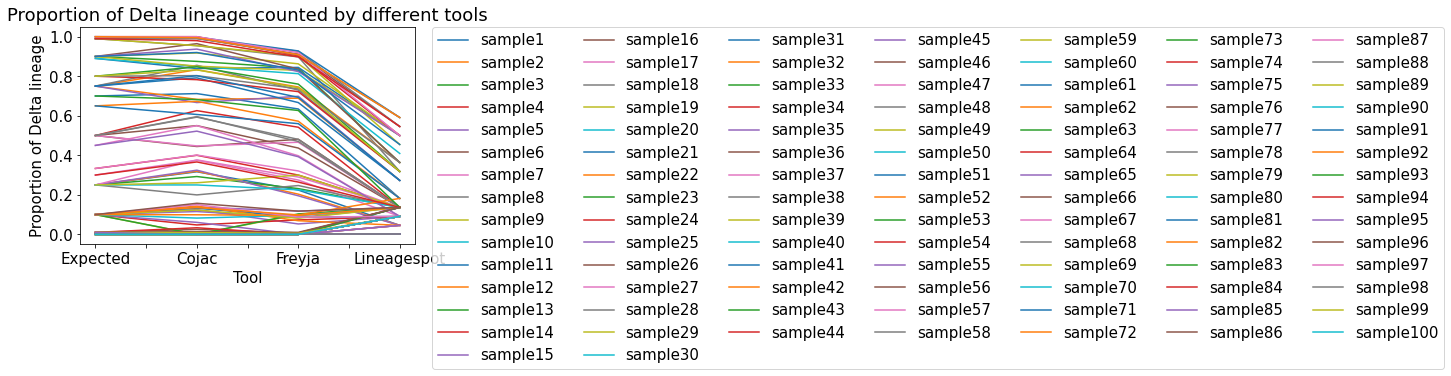

In [84]:
df_col_tool_delta.set_index('Sample').transpose().reset_index().set_index('index').plot();
plt.legend(bbox_to_anchor=(1.05, 1), ncol=7, loc='upper left', borderaxespad=0)
plt.title('Proportion of Delta lineage counted by different tools')
plt.xlabel('Tool') 
plt.ylabel('Proportion of Delta lineage') 
plt.show()

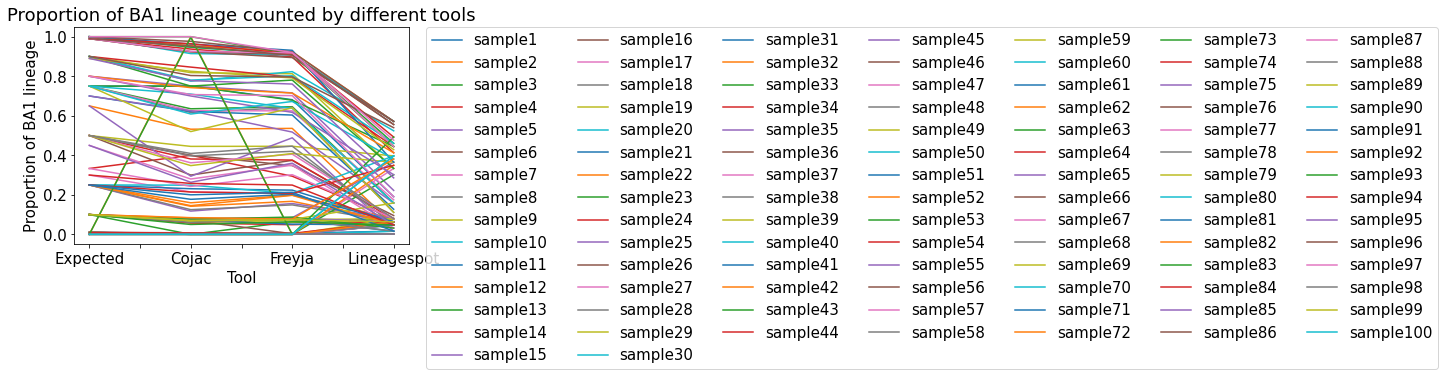

In [45]:
df_col_tool_ba1.set_index('Sample').transpose().reset_index().set_index('index').plot();
plt.legend(bbox_to_anchor=(1.05, 1), ncol=7, loc='upper left', borderaxespad=0)
plt.title('Proportion of BA1 lineage counted by different tools')
plt.xlabel('Tool') 
plt.ylabel('Proportion of BA1 lineage') 
plt.show()

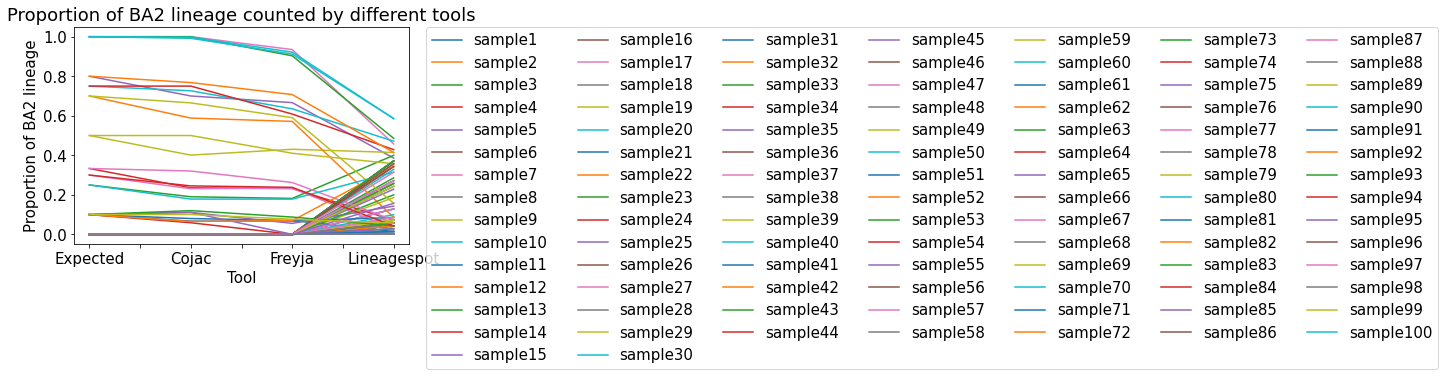

In [46]:
df_col_tool_ba2.set_index('Sample').transpose().reset_index().set_index('index').plot();
plt.legend(bbox_to_anchor=(1.05, 1), ncol=7, loc='upper left', borderaxespad=0)
plt.title('Proportion of BA2 lineage counted by different tools')
plt.xlabel('Tool') 
plt.ylabel('Proportion of BA2 lineage') 
plt.show()

Lineagespot results (proportion of lineage) look different from other tools results because they didn't include a proportion of the rest detected lineages, and sum of proportions of all lineages under consideration (BA.1,BA.2,Delta) is not 1 => we cannot compare results of Freyja and Cojac with Lineagespot. 

In [47]:
fig1 = px.parallel_coordinates(df_col_tool_delta, title = 'Parallel coordinates plot: Delta lineage', color="Freyja",
                              dimensions=['Expected', 'Cojac', 'Freyja'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=0.5)

fig2 = px.parallel_coordinates(df_col_tool_ba1, title = 'Parallel coordinates plot: BA1 lineage', color="Freyja",
                              dimensions=['Expected', 'Cojac', 'Freyja'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=0.5)

fig3 = px.parallel_coordinates(df_col_tool_ba2, title = 'Parallel coordinates plot: BA2 lineage', color="Freyja",
                              dimensions=['Expected', 'Cojac', 'Freyja'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=0.5)
fig1.show()
fig2.show()
fig3.show()

For sample83 and sample52 BA.1 lineage was not expected. Freyja did not detect this lineage. Cojac, in turn, detected 0.9962962963 for sample83, and 1 for sample52 proportion of BA.1 lineage, which is high. The explanation of this is that in mock dataset these two samples contain only recombinant (BA.1+BA.2+Delta). It is also possible for viruses to generate diversity through recombination, which occurs when two different lineages of SARS-CoV-2 infect the same cell. As a result, two different genomes can swap out sections, which is distinct from mutations caused by errors. In this case, the recombinant virus genome occures.

For these 2 samples, it was expected to detect recombination of three (BA.1, BA.2, and Delta) lineages, but not every of these lineages separately. 

Actually, this recombinant contains BA.1 lineage mutations and that's why Cojac misinterpreted results for these samples.

Next 3 parallel coordinated graphs will be focused on the group of samples marked as "single lineage". I separated graphs into different lineages. One graph per lineage.


In [48]:
fig1 = px.parallel_coordinates(df_col_tool_delta_singlin, title = 'Single lineage group of samples: Delta lineage', color="Expected",
                              dimensions=['Expected', 'Cojac', 'Freyja'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=0.5)

fig2 = px.parallel_coordinates(df_col_tool_ba1_singlin, title = 'Single lineage group of samples: BA.1 lineage', color="Expected",
                              dimensions=['Expected', 'Cojac', 'Freyja'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=0.5)

fig3 = px.parallel_coordinates(df_col_tool_ba2_singlin, title = 'Single lineage group of samples: BA.2 lineage', color="Expected",
                              dimensions=['Expected', 'Cojac', 'Freyja'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=0.5)
fig1.show()
fig2.show()
fig3.show()

Next 3 parallel coordinated graphs will be focused on the group of samples marked as "two lineages". However, for 'two samples' group of samples it is not that reasonable to separate graphs into different lineages but focus on ratio l1/l2. Even though, I was interested to have a look at every lineage.


In [49]:
fig1 = px.parallel_coordinates(df_col_tool_delta_twolin, title = 'Two lineages group of samples: Delta lineage', color="Expected",
                              dimensions=['Expected', 'Cojac', 'Freyja'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=0.5)

fig2 = px.parallel_coordinates(df_col_tool_ba1_twolin, title = 'Two lineages group of samples: BA.1 lineage', color="Expected",
                              dimensions=['Expected', 'Cojac', 'Freyja'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=0.5)

fig3 = px.parallel_coordinates(df_col_tool_ba2_twolin, title = 'Two lineages group of samples: BA.2 lineage', color="Expected",
                              dimensions=['Expected', 'Cojac', 'Freyja'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=0.5)
fig1.show()
fig2.show()
fig3.show()

C:\Users\polpo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



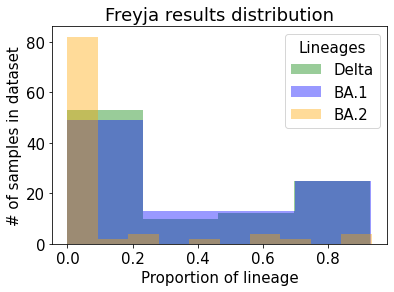

In [50]:
#FREYJA destribution

# Plot the distribution of SARS-CoV-2 DELTA lineage percentage (detected by Freyja) for all samples
#fr_delta_plot = sns.distplot(a=df["fr_delta"], hist=True, kde=False, rug=False, label='Delta variant detected by Freyja')
fr_delta_plot = sns.distplot(a=df_col_tool_delta["Freyja"], hist=True, kde=False, rug=False, color='green')
# Plot the distribution of SARS-CoV-2 BA1 lineage percentage (detected by Freyja) for all samples
fr_ba1_plot = sns.distplot(a=df_col_tool_ba1["Freyja"], hist=True, kde=False, rug=False, color='blue')
# Plot the distribution of SARS-CoV-2 BA2 lineage percentage (detected by Freyja) for all samples
fr_ba2_plot = sns.distplot( a=df_col_tool_ba2["Freyja"], hist=True, kde=False, rug=False, color='orange')
plt.title(label='Freyja results distribution')
plt.xlabel(xlabel='Proportion of lineage')
plt.ylabel(ylabel='# of samples in dataset')
plt.legend(title='Lineages', loc='upper right', labels=['Delta', 'BA.1', 'BA.2'])
plt.show()

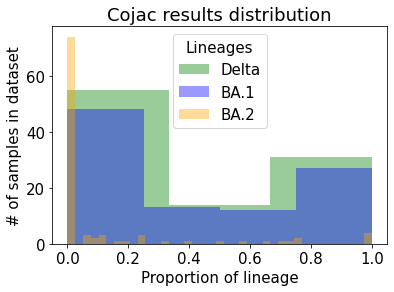

In [51]:
#COJAC destribution

# Plot the distribution of SARS-CoV-2 Delta lineage percentage (detected by Cojac) for all samples
co_delta_plot = sns.distplot(a=df_col_tool_delta["Cojac"], hist=True, kde=False, rug=False, color='green')
# Plot the distribution of SARS-CoV-2 BA1 lineage percentage (detected by Cojac) for all samples
co_ba1_plot = sns.distplot(a=df_col_tool_ba1["Cojac"], hist=True, kde=False, rug=False, color='blue')
# Plot the distribution of SARS-CoV-2 BA2 lineage percentage (detected by Cojac) for all samples
co_ba2_plot = sns.distplot( a=df_col_tool_ba2["Cojac"], hist=True, kde=False, rug=False, color='orange' )


plt.title(label='Cojac results distribution')
plt.xlabel(xlabel='Proportion of lineage')
plt.ylabel(ylabel='# of samples in dataset')
plt.legend(title='Lineages', loc='upper center', labels=['Delta', 'BA.1', 'BA.2'])
plt.show()

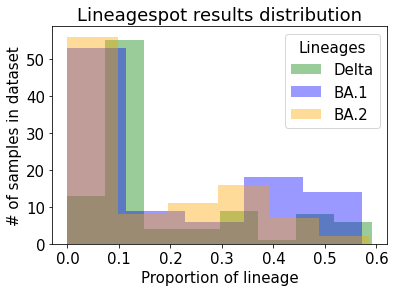

In [52]:
#Lineagespot distribution

# Plot the distribution of SARS-CoV-2 Delta lineage percentage (detected by Lineagespot) for all samples
ls_delta_plot = sns.distplot(a=df_col_tool_delta["Lineagespot"], hist=True, kde=False, rug=False, color='green')
# Plot the distribution of SARS-CoV-2 BA1 lineage percentage (detected by Lineagespot) for all samples
ls_ba1_plot = sns.distplot(a=df_col_tool_ba1["Lineagespot"], hist=True, kde=False, rug=False, color='blue')
# Plot the distribution of SARS-CoV-2 BA2 lineage percentage (detected by Lineagespot) for all samples
ls_ba2_plot = sns.distplot( a=df_col_tool_ba2["Lineagespot"], hist=True, kde=False, rug=False, color='orange')
plt.title(label='Lineagespot results distribution')
plt.xlabel(xlabel='Proportion of lineage')
plt.ylabel(ylabel='# of samples in dataset')
plt.legend(title='Lineages', loc='upper right', labels=['Delta', 'BA.1', 'BA.2'])
plt.show()

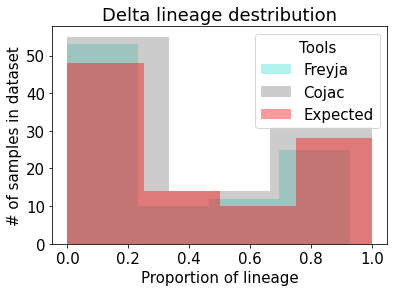

In [53]:
#Delta distribution

fr_delta_plot = sns.distplot(a=df_col_tool_delta["Freyja"], hist=True, kde=False, rug=False, color='turquoise')
co_delta_plot = sns.distplot(a=df_col_tool_delta["Cojac"], hist=True, kde=False, rug=False, color='gray')
#ls_delta_plot = sns.distplot(a=df_col_tool_delta["Lineagespot"], hist=True, kde=False, rug=False )
ex_delta_plot = sns.distplot(a=df_col_tool_delta["Expected"], hist=True, kde=False, rug=False, color='red')
plt.title(label='Delta lineage destribution')
plt.xlabel(xlabel='Proportion of lineage')
plt.ylabel(ylabel='# of samples in dataset')
#plt.legend(title='Tools', loc='upper right', labels=['Freyja', 'Cojac', 'Lineagespot', 'Expected'])
plt.legend(title='Tools', loc='upper right', labels=['Freyja', 'Cojac', 'Expected'])
plt.show()

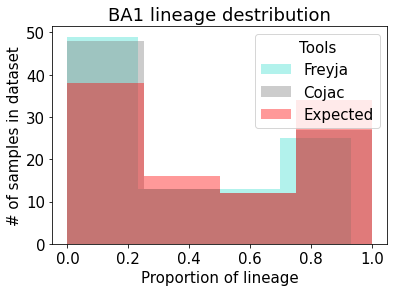

In [54]:
#BA1 distribution

fr_ba1_plot = sns.distplot( a=df_col_tool_ba1["Freyja"], hist=True, kde=False, rug=False, color='turquoise')
co_ba1_plot = sns.distplot(a=df_col_tool_ba1["Cojac"], hist=True, kde=False, rug=False, color='gray')
#ls_ba1_plot = sns.distplot(a=df_col_tool_ba1["Lineagespot"], hist=True, kde=False, rug=False )
ex_ba1_plot = sns.distplot(a=df_col_tool_ba1["Expected"], hist=True, kde=False, rug=False, color='red')
plt.title(label='BA1 lineage destribution')
plt.xlabel(xlabel='Proportion of lineage')
plt.ylabel(ylabel='# of samples in dataset')
#plt.legend(title='Tools', loc='upper right', labels=['Freyja', 'Cojac', 'Lineagespot', 'Expected'])
plt.legend(title='Tools', loc='upper right', labels=['Freyja', 'Cojac', 'Expected'])
plt.show()

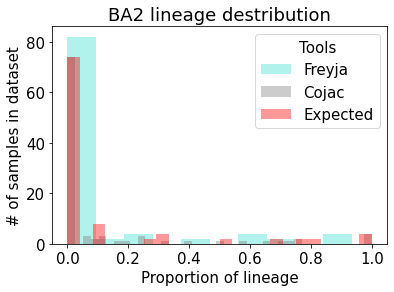

In [55]:
#BA2 distribution

fr_ba2_plot = sns.distplot( a=df_col_tool_ba2["Freyja"], hist=True, kde=False, rug=False, color='turquoise')
co_ba2_plot = sns.distplot(a=df_col_tool_ba2["Cojac"], hist=True, kde=False, rug=False, color='gray')
#ls_ba2_plot = sns.distplot(a=df_col_tool_ba2["Lineagespot"], hist=True, kde=False, rug=False )
ex_ba2_plot = sns.distplot(a=df_col_tool_ba2["Expected"], hist=True, kde=False, rug=False, color='red')
plt.title(label='BA2 lineage destribution')
plt.xlabel(xlabel='Proportion of lineage')
plt.ylabel(ylabel='# of samples in dataset')
#plt.legend(title='Tools', loc='upper right', labels=['Freyja', 'Cojac', 'Lineagespot', 'Expected'])
plt.legend(title='Tools', loc='upper right', labels=['Freyja', 'Cojac', 'Expected'])
plt.show()

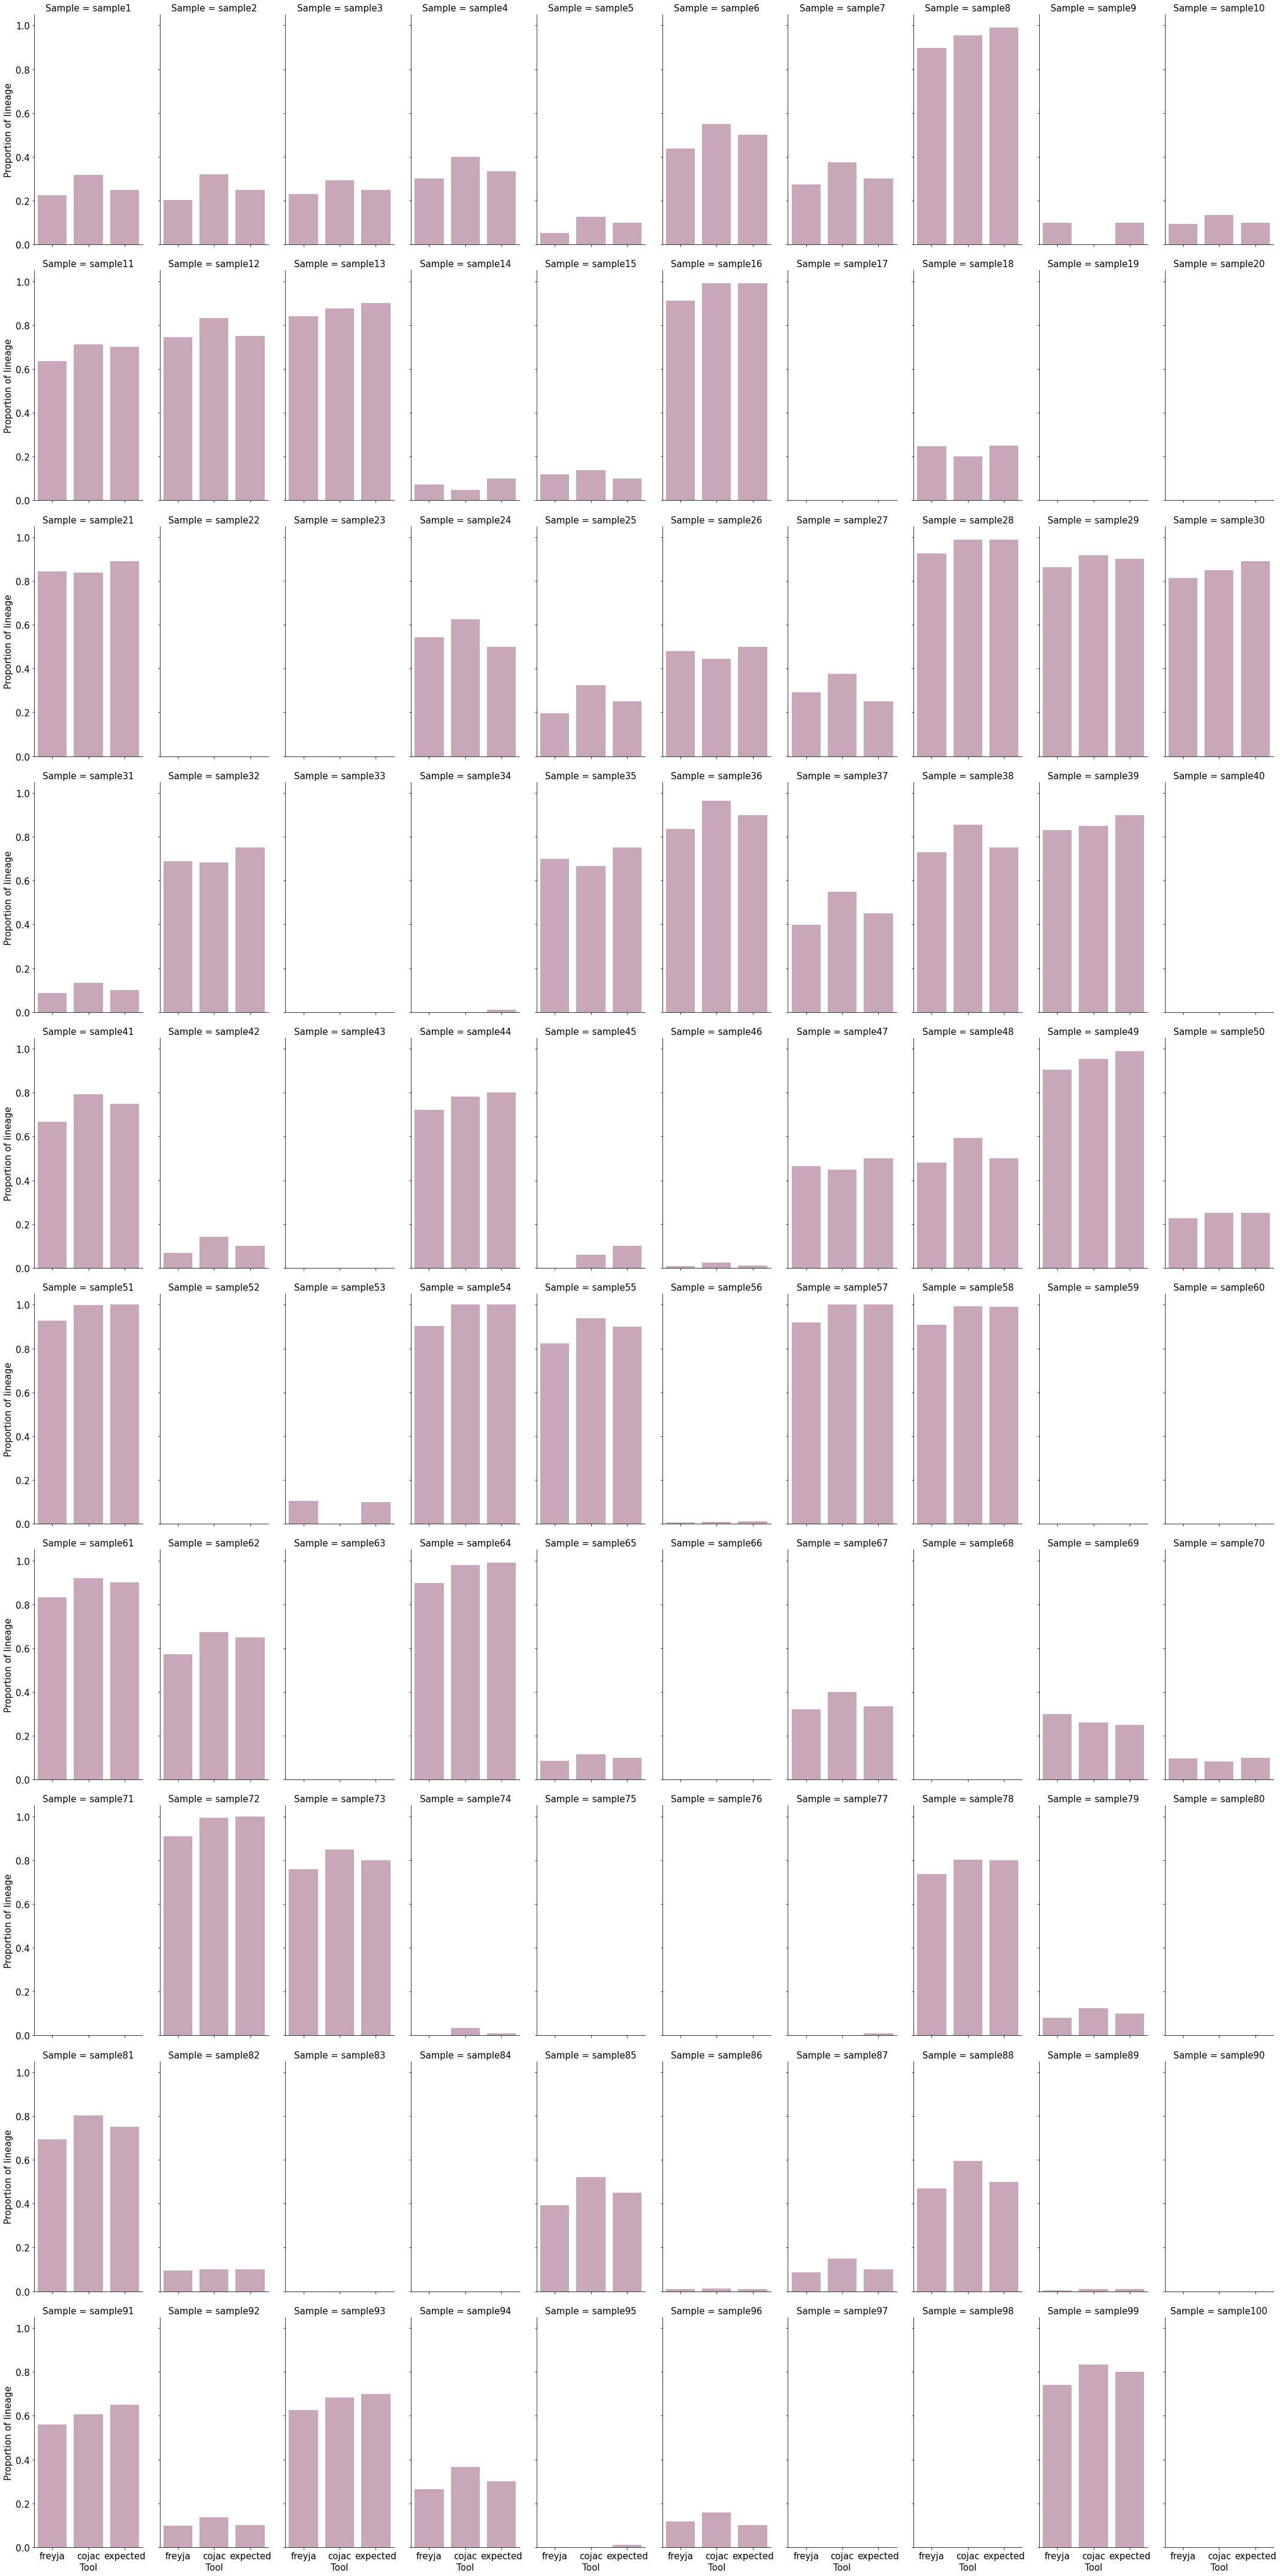

In [56]:
#plot distribution of delta lineage for every sample (freyja,cojac, expected)
g = sns.FacetGrid(df_delta_lineorient, col_wrap=10, col="Sample", height=6, aspect=.5)
#g.map(sns.barplot, "Tool", "Proportion of lineage", color="#cea1bc", order=["freyja", "cojac", "lineagespot", "expected"])
g.map(sns.barplot, "Tool", "Proportion of lineage", color="#cea1bc", order=["freyja", "cojac", "expected"])
plt.show()

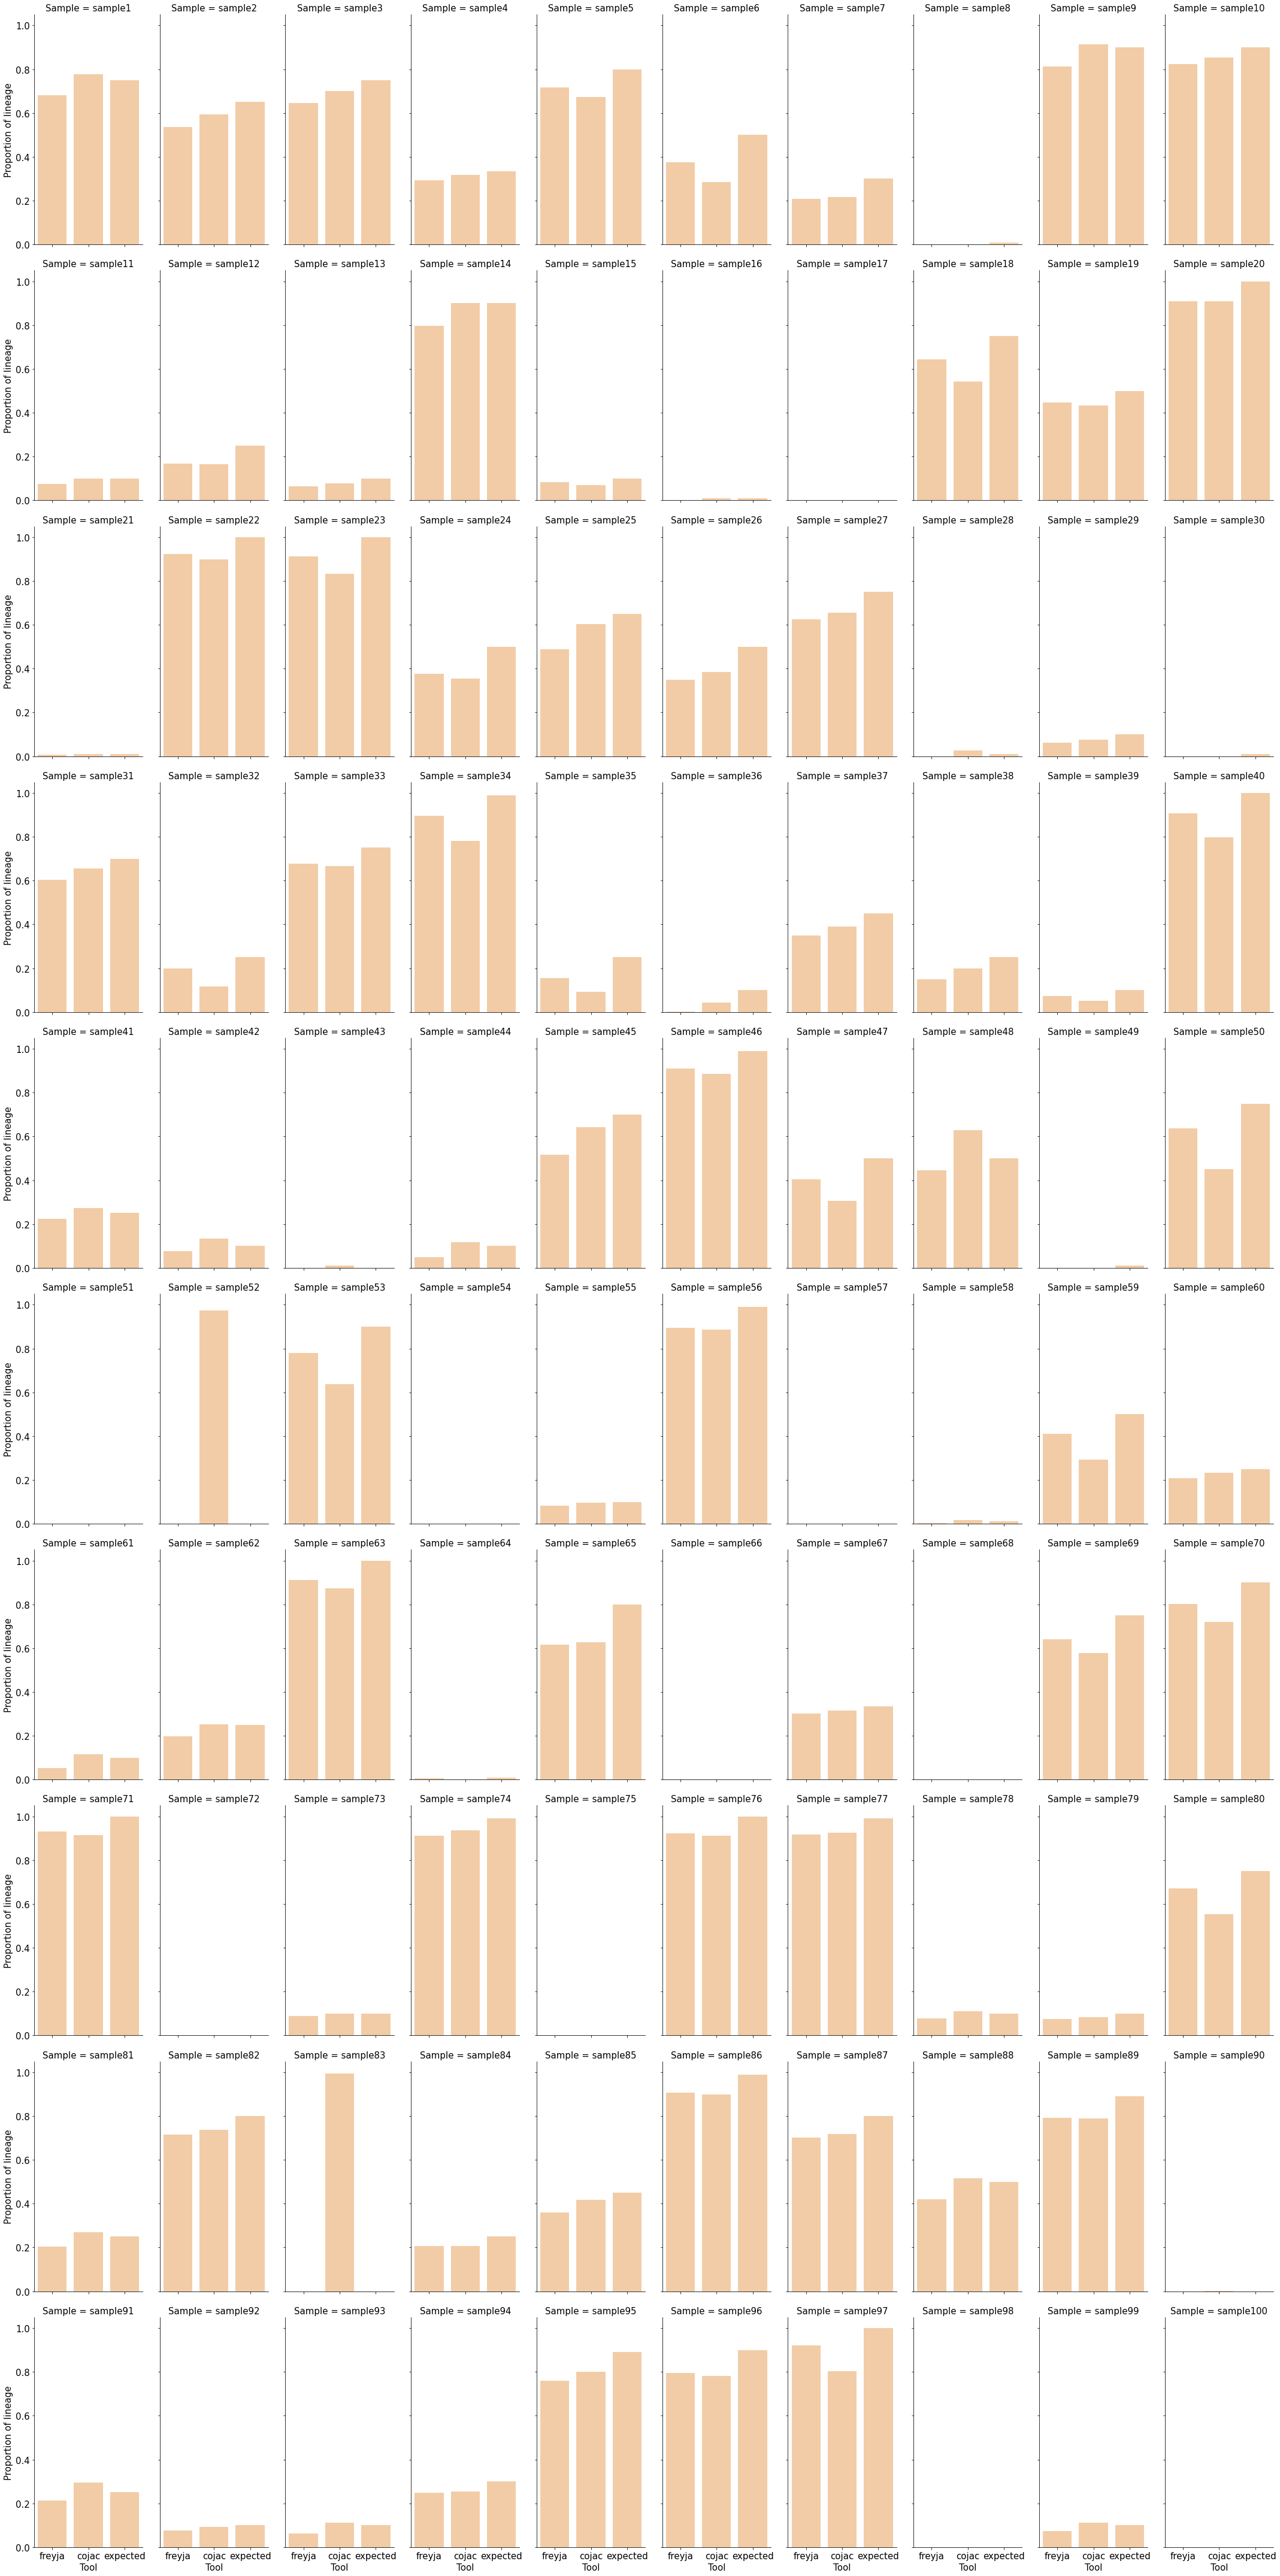

In [57]:
#plot distribution of BA1 lineage for every sample (freyja,cojac,expected)
g = sns.FacetGrid(df_ba1_lineorient, col_wrap=10, col="Sample", height=6, aspect=.5)
#g.map(sns.barplot, "Tool", "Proportion of lineage", color="#ffcc99", order=["freyja", "cojac", "lineagespot", "expected"])
g.map(sns.barplot, "Tool", "Proportion of lineage", color="#ffcc99", order=["freyja", "cojac", "expected"])
plt.show()

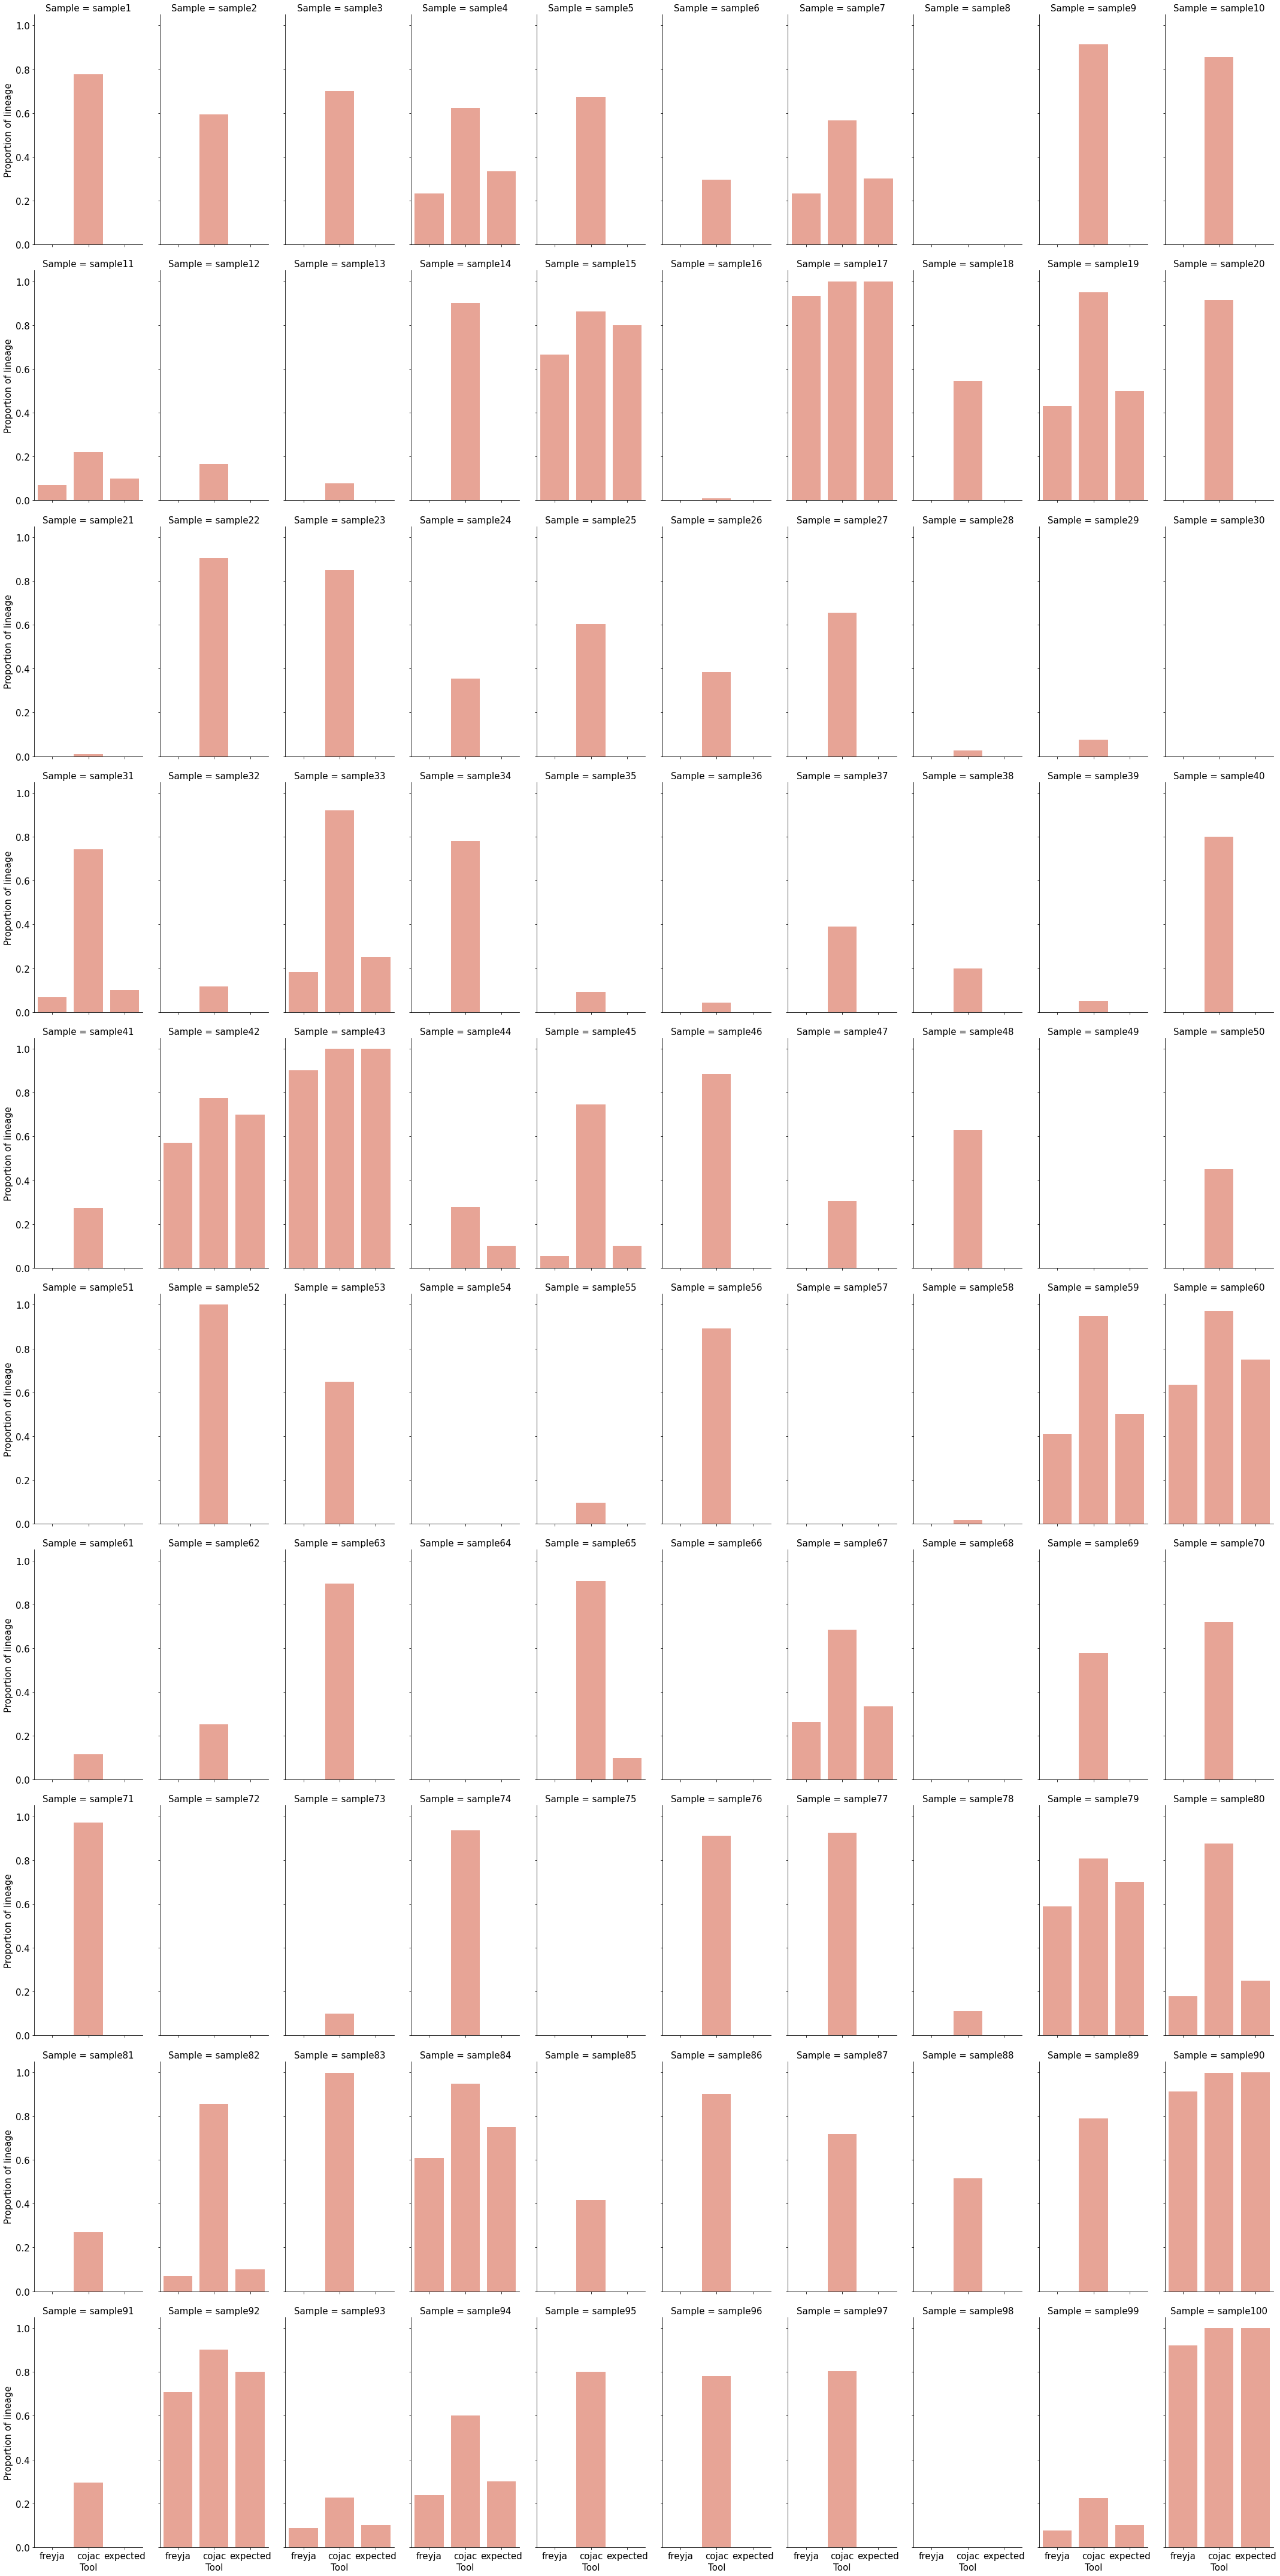

In [58]:
#plot distribution of BA2 lineage for every sample (freyja,cojac,expected)
g = sns.FacetGrid(df_ba2_lineorient, col_wrap=10, col="Sample", height=6, aspect=.5)
#g.map(sns.barplot, "Tool", "Proportion of lineage", color="#f49b89", order=["freyja", "cojac", "lineagespot", "expected"])
g.map(sns.barplot, "Tool", "Proportion of lineage", color="#f49b89", order=["freyja", "cojac", "expected"])
plt.show()

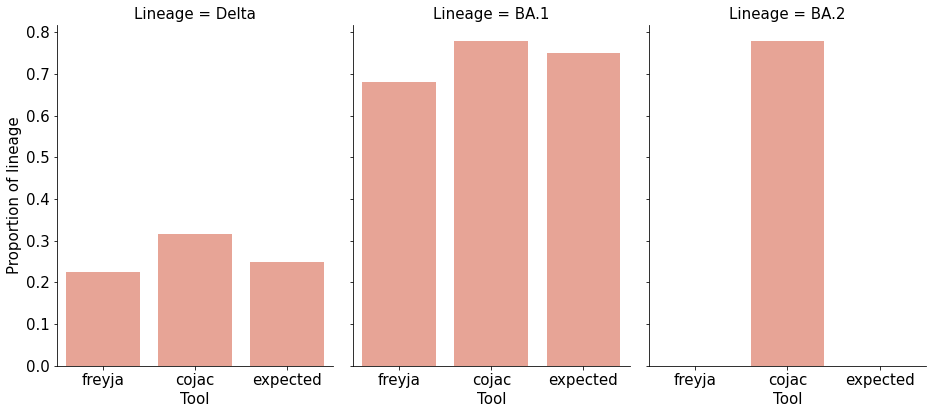

In [59]:
#for sample1
plt.rcParams.update({'font.size': 15})
g = sns.FacetGrid(df_line_s1, col_wrap=10, col="Lineage", height=6, aspect=.7)
#g.map(sns.barplot, "Tool", "Proportion of lineage", color="#f49b89", order=["freyja", "cojac", "lineagespot", "expected"])
g.map(sns.barplot, "Tool", "Proportion of lineage", color="#f49b89", order=["freyja", "cojac", "expected"])
plt.show()

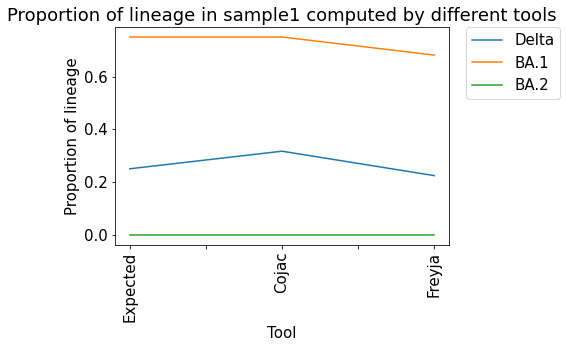

In [60]:
#line graph for one sample
df_col_tool_s1_transposed = (df_col_tool_s1
#                             .drop((['Sample','Lineage color']), axis=1)
                             .drop((['Sample','Lineage color', 'Lineagespot']), axis=1)
                             .set_index('Lineage').transpose().reset_index())
df_col_tool_s1_transposed.set_index('index').plot();


plt.legend(bbox_to_anchor=(1.05, 1), ncol=1, loc='upper left', borderaxespad=0)
plt.xticks(rotation = 90)
plt.title('Proportion of lineage in sample1 computed by different tools')
plt.xlabel('Tool') 
plt.ylabel('Proportion of lineage') 
plt.show()

In [61]:
#parallel coordinates plot (for one sample)
fig = px.parallel_coordinates(df_col_tool_s1, color="Lineage color", range_color=[0, 1],
                              dimensions=['Expected','Cojac','Freyja'],
                              color_continuous_scale=[(0.00, "#003f5c"),   (0.33, "#003f5c"),
                                                     (0.33, "#bc5090"), (0.66, "#bc5090"),
                                                     (0.66, "#ffa600"),  (1.00, "#ffa600")],
                              color_continuous_midpoint=0.5)
fig.update_layout(coloraxis_colorbar=dict(
    title="Lineages",
    tickvals=[0,0.5,1],
    ticktext=["Delta","Omicron (BA.1)","Omicron (BA.2)"],
    lenmode="pixels", len=120,
))
fig.show()


In [62]:
#PCA grouped by lineage
X = df_col_tool[['Freyja', 'Lineagespot', 'Cojac', 'Expected']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df_col_tool['Lineage'])
fig.show()

In [63]:
#3d
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df_col_tool['Lineage'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [64]:
#based on https://plotly.com/python/pca-visualization/
#Loadings visualization

features = ['Freyja', 'Lineagespot', 'Cojac', 'Expected']
X = df_col_tool[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df_col_tool['Lineage'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

# Interpretation of PCA analysis: 
'Freyja', 'Cojac', 'Expected' clip together on the loading plot, that means that they are positively corellated with each other. Lineagespot is close to them and shows a positive corellation.
Cojac results are distanced a bit, but also all features are rather positively corellated.

In [65]:
#Grouping by coverage
X = df_pca[['Proportion of lineage (Freyja)', 'Proportion of lineage (Lineagespot)', 'Proportion of lineage (Cojac)', 'Proportion of lineage (Expected)']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df_pca['Group 3 Coverage (Expected)'])
fig.show()

In [66]:
#3d
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df_pca['Group 3 Coverage (Expected)'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [67]:
#Grouping by number of lineages expected   Group 1 (Expected)
X = df_pca[['Proportion of lineage (Freyja)', 'Proportion of lineage (Lineagespot)', 'Proportion of lineage (Cojac)', 'Proportion of lineage (Expected)']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df_pca['Group 1 (Expected)'])
fig.show()

In [68]:
#3d
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df_pca['Group 1 (Expected)'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [69]:
#Grouping by combination of lineages expected
X = df_pca[['Proportion of lineage (Freyja)', 'Proportion of lineage (Lineagespot)', 'Proportion of lineage (Cojac)', 'Proportion of lineage (Expected)']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df_pca['Group 2 Lineage (Expected)'])
fig.show()

In [70]:
#3d
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df_pca['Group 2 Lineage (Expected)'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [71]:
#NOT SURE IF IT IS REASONABLE
#PCA, features: distances between expected results and rresults from chosen tools
X = df_pca[['Distance Freyja to Expected', 'Distance Lineagespot to Expected', 'Distance Cojac to Expected']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df_pca['Lineage'])
fig.show()

In [72]:
#3d
X = df_pca[['Distance Freyja to Expected', 'Distance Lineagespot to Expected', 'Distance Cojac to Expected']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df_pca['Lineage'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

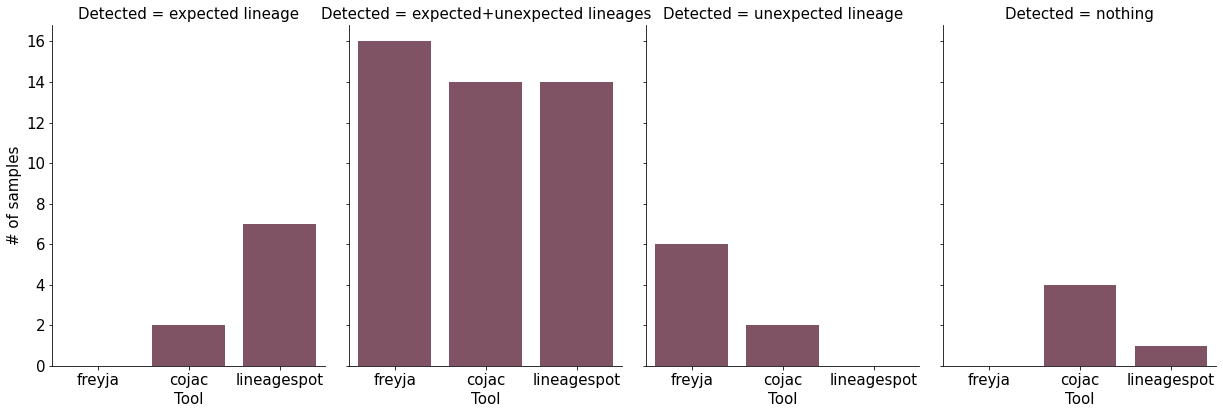

In [73]:
#Single lineage group of samples
g = sns.FacetGrid(df_single, col_wrap=10, col="Detected", height=6, aspect=.7)
g.map(sns.barplot, "Tool", "# of samples", color="#874C62", order=["freyja", "cojac", "lineagespot"])
plt.show()

Overall, 22 samples are in Single lineage group. From barplot it's obvious that all three tools are effective in detecting expected lineage. Nonetheless, in detection of only expected lineage and nothing more, Lineagespot performed the best, compared to Cojac and Freyja. Freyja is effective at detecting expected lineage, however, always detected some unexpected lineages. Cojac's results are close to Freyja's results but Cojac was able to detect 2 samples with expected lineage. Other interesting observation is that in 4 samples Cojac is rather to detect nothing than expected lineage.

#### In the bar graph below we look at the percentage of all subgroups of "Single lineage" group

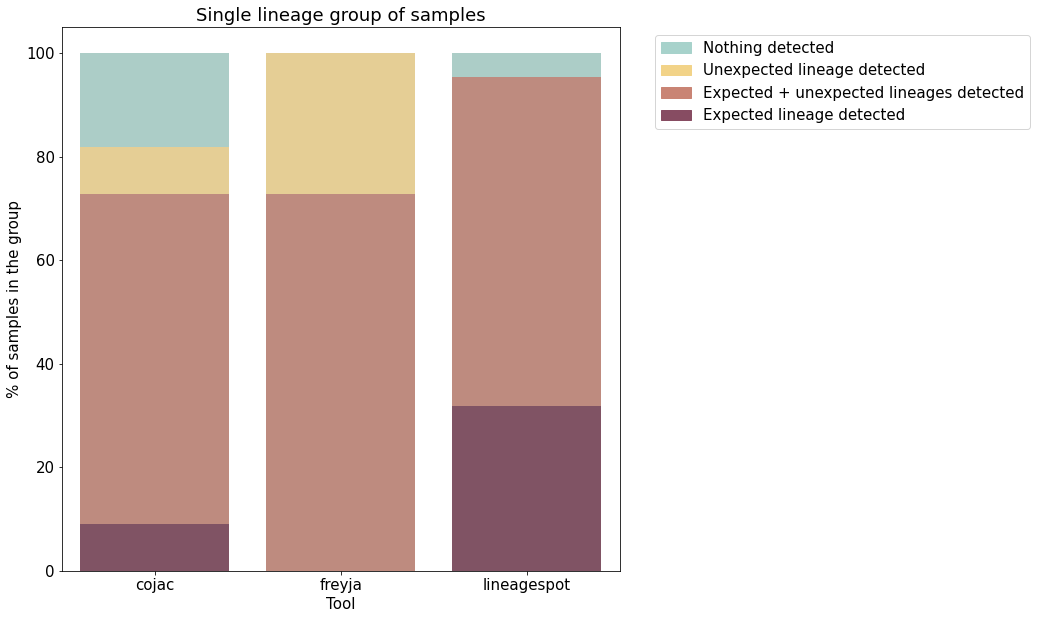

In [74]:
# set the figure size
plt.figure(figsize=(10, 10))

# from raw value to percentage
total = df_single.groupby('Tool')['% of samples in the group'].sum().reset_index()
correct = df_single[df_single.Detected=='expected lineage'].groupby('Tool')['% of samples in the group'].sum().reset_index()
correctwrong = df_single[df_single.Detected=='expected+unexpected lineages'].groupby('Tool')['% of samples in the group'].sum().reset_index()
wrong = df_single[df_single.Detected=='unexpected lineage'].groupby('Tool')['% of samples in the group'].sum().reset_index()
nothing = df_single[df_single.Detected=='nothing'].groupby('Tool')['% of samples in the group'].sum().reset_index()

correct['% of samples in the group'] = [i / j * 100 for i,j in zip(correct['% of samples in the group'], total['% of samples in the group'])]
correctwrong['% of samples in the group'] =correct['% of samples in the group'] + correctwrong['% of samples in the group']
wrong['% of samples in the group'] = correctwrong['% of samples in the group'] + wrong['% of samples in the group']
total['% of samples in the group'] = wrong['% of samples in the group'] + nothing['% of samples in the group']

# bar chart 1 nothing
bar1 = sns.barplot(x="Tool", y="% of samples in the group", data=total, color='#A7D2CB')

# bar chart 2 -> wrong
bar2 = sns.barplot(x="Tool", y="% of samples in the group", data=wrong, color='#F2D388')

# bar chart 3 -> correctwrong
bar3 = sns.barplot(x="Tool", y="% of samples in the group", data=correctwrong, color='#C98474')

# bar chart 4 -> correct
bar4 = sns.barplot(x="Tool", y="% of samples in the group", data=correct, color='#874C62')

# add legend
top_bar = mpatches.Patch(color='#A7D2CB', label='Nothing detected')
top_mid_bar = mpatches.Patch(color='#F2D388', label='Unexpected lineage detected')
bottom_mid_bar = mpatches.Patch(color='#C98474', label='Expected + unexpected lineages detected')
bottom_bar = mpatches.Patch(color='#874C62', label='Expected lineage detected')
plt.legend(handles=[top_bar, top_mid_bar, bottom_mid_bar, bottom_bar], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title(label='Single lineage group of samples')

# show the graph
plt.show()

#### The same graph as above but  we look at the # of samples (instead of %)

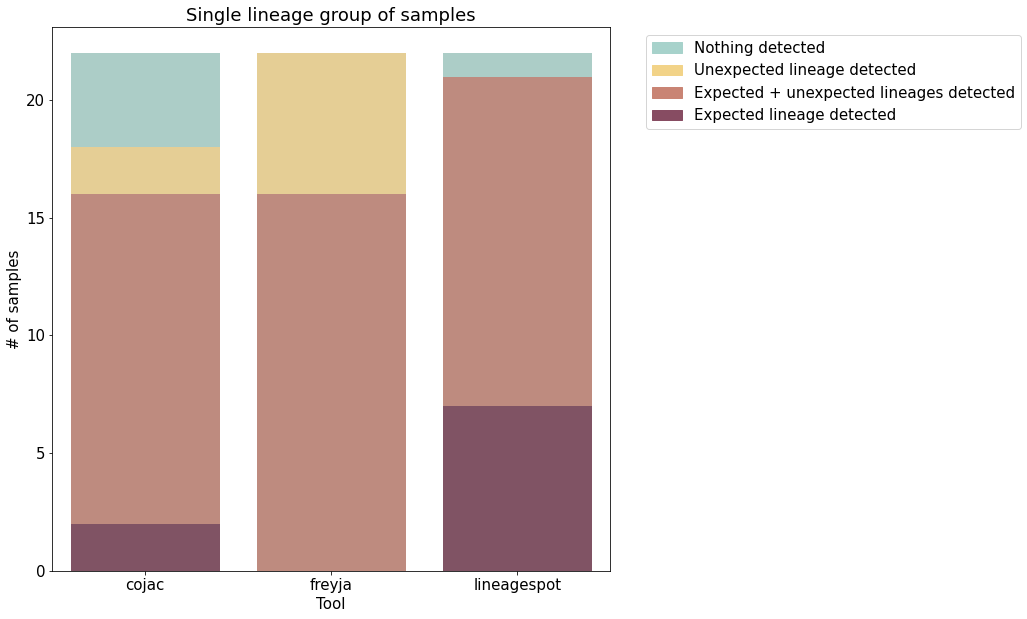

In [75]:
# set the figure size
plt.figure(figsize=(10, 10))

# from raw value to percentage
total = df_single.groupby('Tool')['# of samples'].sum().reset_index()
correct = df_single[df_single.Detected=='expected lineage'].groupby('Tool')['# of samples'].sum().reset_index()
correctwrong = df_single[df_single.Detected=='expected+unexpected lineages'].groupby('Tool')['# of samples'].sum().reset_index()
wrong = df_single[df_single.Detected=='unexpected lineage'].groupby('Tool')['# of samples'].sum().reset_index()
nothing = df_single[df_single.Detected=='nothing'].groupby('Tool')['# of samples'].sum().reset_index()

#correct['# of samples'] = correct['# of samples']
correct['# of samples'] = [i / j * 22 for i,j in zip(correct['# of samples'], total['# of samples'])]

correctwrong['# of samples'] = correct['# of samples'] + correctwrong['# of samples']
wrong['# of samples'] = correctwrong['# of samples'] + wrong['# of samples']
total['# of samples'] = wrong['# of samples'] + nothing['# of samples']

# bar chart 1 nothing
bar1 = sns.barplot(x="Tool", y="# of samples", data=total, color='#A7D2CB')

# bar chart 2 -> wrong
bar2 = sns.barplot(x="Tool", y="# of samples", data=wrong, color='#F2D388')

# bar chart 3 -> correctwrong
bar3 = sns.barplot(x="Tool", y="# of samples", data=correctwrong, color='#C98474')

# bar chart 4 -> correct
bar4 = sns.barplot(x="Tool", y="# of samples", data=correct, color='#874C62')

# add legend
top_bar = mpatches.Patch(color='#A7D2CB', label='Nothing detected')
top_mid_bar = mpatches.Patch(color='#F2D388', label='Unexpected lineage detected')
bottom_mid_bar = mpatches.Patch(color='#C98474', label='Expected + unexpected lineages detected')
bottom_bar = mpatches.Patch(color='#874C62', label='Expected lineage detected')
plt.legend(handles=[top_bar, top_mid_bar, bottom_mid_bar, bottom_bar], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title(label='Single lineage group of samples')

# show the graph
plt.show()

The barplot shows that Freyja is effective tool for detecting expected lineage, even though Freyja always detect other lineages. When it is expected the sample to contain only one lineage but nothing more, Freyja is not that effective. Moreover, in 6 samples for Freyja and in 2 samples for Cojac (out of 22) there were detected unexpected, i.e. incorrect, lineages. On the other hand, Lineagespot is effective in the case of detecting only expected lineages, probably because it has the additional step in its pipeline when the most probable lineages are assigned for the sample. This extra step is made based on several indicators. So Lineagespot detected only expected lineage in 7 samples out of 22 samples from single lineage group. As for Cojac, it's is performed quite good and was able to detect only one lineage that was expected in 2 out of 22 samples, however, for 4 samples with expected lineage Cojac detected nothing. 

C:\Users\polpo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



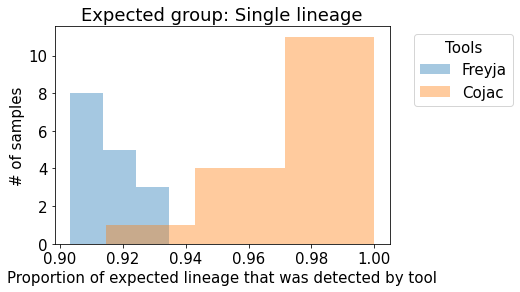

In [76]:
fr_plot = sns.distplot(a=df_col_tool_singlin["Freyja"], hist=True, kde=False, rug=False)
co_plot = sns.distplot(a=df_col_tool_singlin["Cojac"], hist=True, kde=False, rug=False )
plt.title(label='Expected group: Single lineage')
plt.xlabel(xlabel='Proportion of expected lineage that was detected by tool')

plt.ylabel(ylabel='# of samples')
plt.legend(title='Tools', loc='upper left', bbox_to_anchor=(1.05, 1), labels=['Freyja', 'Cojac'])
plt.show()

Further, considering only samples were expected lineage was detected, the distribution of lineage proportion detected by Freyja and Cojac among samples of Single lineage group was plotted. Only Freyja and Cojac were compared. I do not consider Lineagespot here because in the results of Lineagespot I do not have a clean proportion distribution between lineages. There is no information about other lineages detected (aside from BA.1,BA.2,Delta) while the sum of proportions of these three is no equal to 1 in Lineagespot.

Looking at the plot, I conclude that for single lineage detection results of lineage proportionCojac and Freyja are from 0.9 to 1. However, some differences between Freyja and Cojac results are observed. Freyja showed lower proportion of expected lineage, while for Cojac the proportion tends to 1 which is expected. Thus, we can guess that Cojac results for single lineage group are closer to expected.

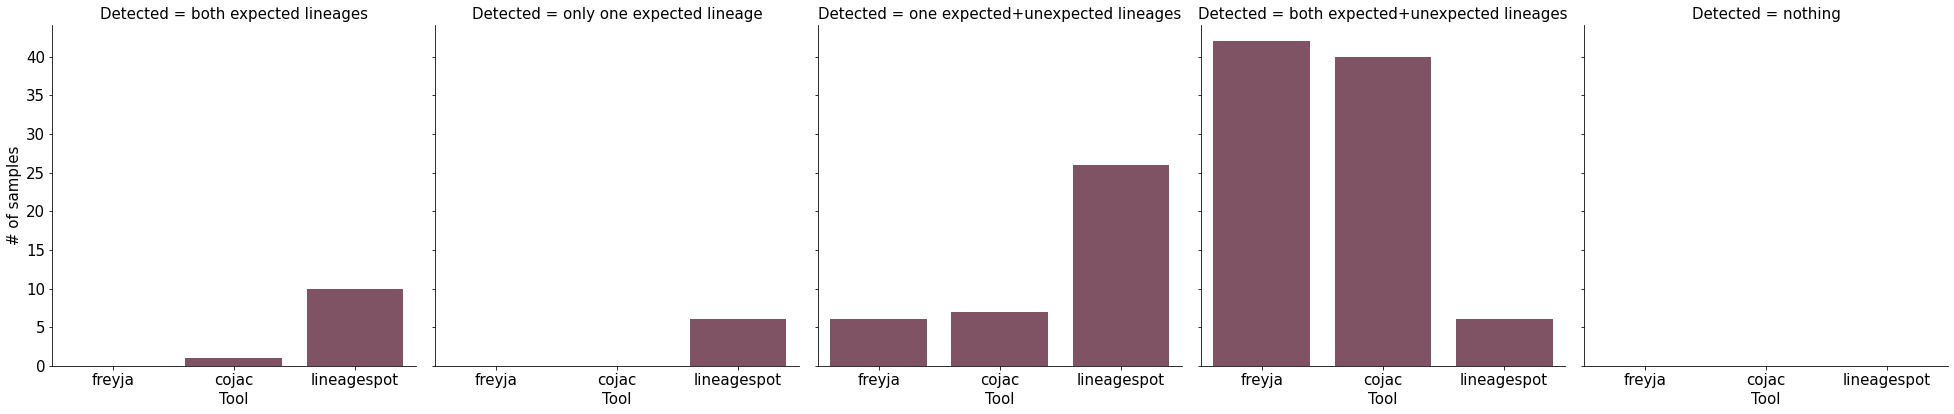

In [77]:
#Two lineages group of samples
g = sns.FacetGrid(df_twolin_group, col_wrap=10, col="Detected", height=6, aspect=.9)
g.map(sns.barplot, "Tool", "# of samples", color="#874C62", order=["freyja", "cojac", "lineagespot"])
plt.show()

Overall, 48 samples are in Two lineages group. From barplot it's obvious that all three tools are effective in detecting both expected lineages. Nonetheless, in detection of only twp expected lineages and nothing more. Lineagespot performed the best, compared to Cojac and Freyja as it is the only tool that was able to detect 10 samples out of 48 with two expected lineages and nothing more. As is was already show for Single lineage group, Freyja is effective at detecting expected lineages (in 42 samples out of 48), however, always detected some unexpected lineages. Cojac's results for two lineages are considerably close to Freyja's results, they both detected around 40 samples with two lineages expected. Even more, in one sample Cojac was able to detect only expected lineages. Interestingly, no tools detected nothing for this group of samples.

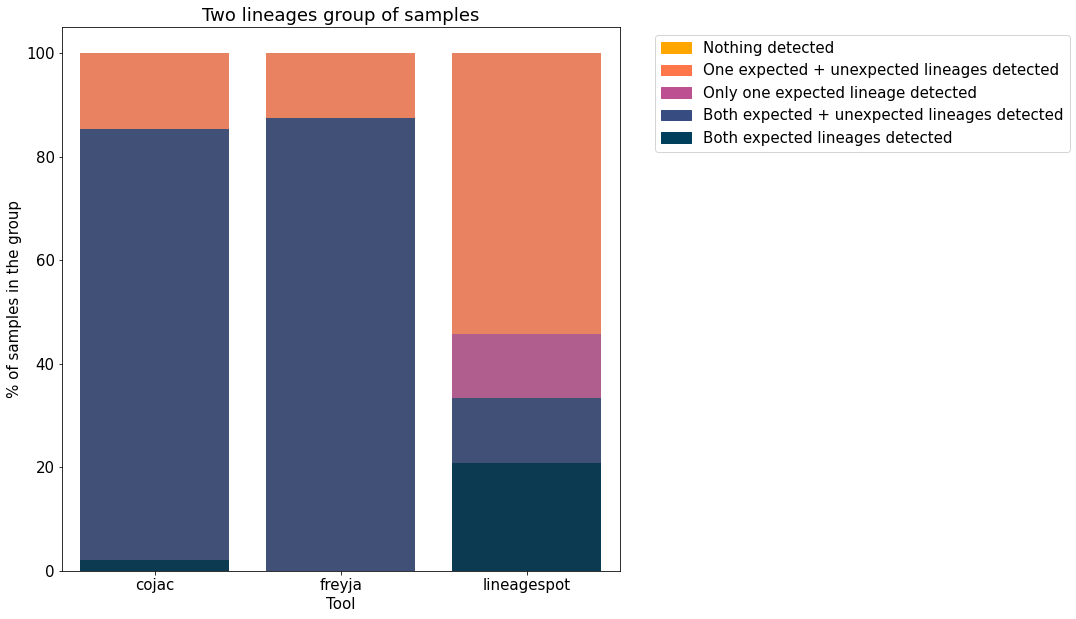

In [78]:
# set the figure size
plt.figure(figsize=(10, 10))

# from raw value to percentage
total = df_twolin_group.groupby('Tool')['% of samples in the group'].sum().reset_index()
correct = df_twolin_group[df_twolin_group.Detected=='both expected lineages'].groupby('Tool')['% of samples in the group'].sum().reset_index()
correct12other = df_twolin_group[df_twolin_group.Detected=='both expected+unexpected lineages'].groupby('Tool')['% of samples in the group'].sum().reset_index()
only1 = df_twolin_group[df_twolin_group.Detected=='only one expected lineage'].groupby('Tool')['% of samples in the group'].sum().reset_index()
correct1other = df_twolin_group[df_twolin_group.Detected=='one expected+unexpected lineages'].groupby('Tool')['% of samples in the group'].sum().reset_index()
nothing = df_twolin_group[df_twolin_group.Detected=='nothing'].groupby('Tool')['% of samples in the group'].sum().reset_index()

correct['% of samples in the group'] = [i / j * 100 for i,j in zip(correct['% of samples in the group'], total['% of samples in the group'])]
correct12other['% of samples in the group'] = correct['% of samples in the group'] + correct12other['% of samples in the group']
only1['% of samples in the group'] =correct12other['% of samples in the group'] + only1['% of samples in the group']
correct1other['% of samples in the group'] = only1['% of samples in the group'] + correct1other['% of samples in the group']
total['% of samples in the group'] = correct1other['% of samples in the group'] + nothing['% of samples in the group']

# bar chart 1 nothing
bar1 = sns.barplot(x="Tool", y="% of samples in the group", data=total, color='#ffa600')

# bar chart 2 -> correct12other
bar2 = sns.barplot(x="Tool", y="% of samples in the group", data=correct1other, color='#ff764a')

# bar chart 3 -> correct1other
bar4 = sns.barplot(x="Tool", y="% of samples in the group", data=only1, color='#bc5090')

# bar chart 4 -> only1
bar6 = sns.barplot(x="Tool", y="% of samples in the group", data=correct12other, color='#374c80')

# bar chart 5 -> correct
bar7 = sns.barplot(x="Tool", y="% of samples in the group", data=correct, color='#003f5c')

# add legend
bar_floor5 = mpatches.Patch(color='#ffa600', label='Nothing detected')
bar_floor4 = mpatches.Patch(color='#ff764a', label='One expected + unexpected lineages detected')
bar_floor3 = mpatches.Patch(color='#bc5090', label='Only one expected lineage detected')
bar_floor2 = mpatches.Patch(color='#374c80', label='Both expected + unexpected lineages detected')
bar_floor1 = mpatches.Patch(color='#003f5c', label='Both expected lineages detected')
plt.legend(handles=[bar_floor5, bar_floor4, bar_floor3, bar_floor2, bar_floor1], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title(label='Two lineages group of samples')

# show the graph
plt.show()

#### The same graph as above but  we look at the # of samples (instead of %)

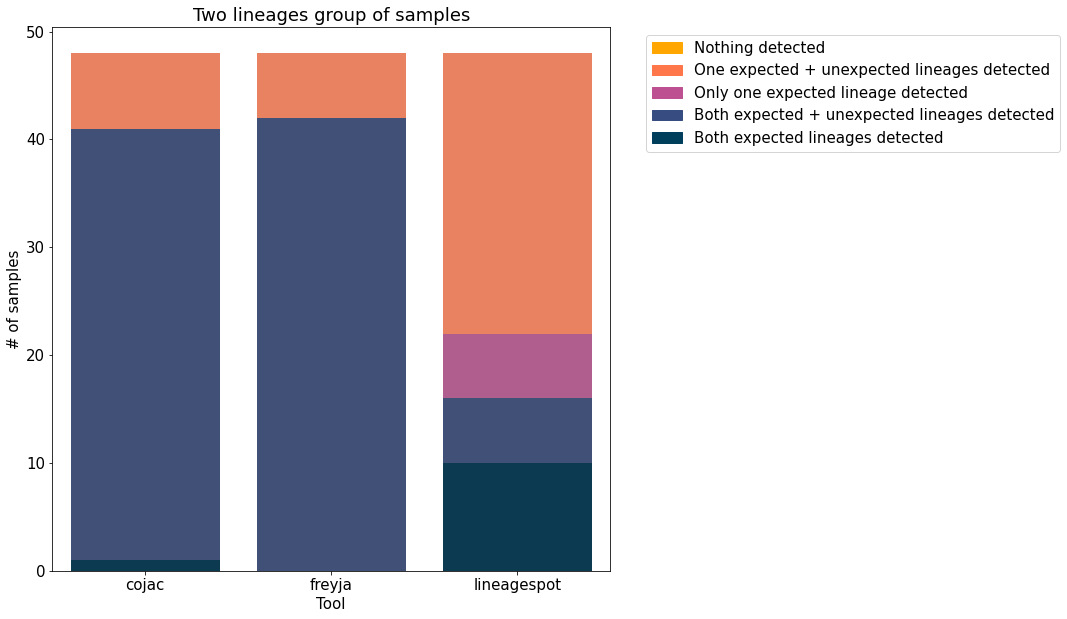

In [79]:
# set the figure size
plt.figure(figsize=(10, 10))

# from raw value to percentage
total = df_twolin_group.groupby('Tool')['# of samples'].sum().reset_index()
correct = df_twolin_group[df_twolin_group.Detected=='both expected lineages'].groupby('Tool')['# of samples'].sum().reset_index()
correct12other = df_twolin_group[df_twolin_group.Detected=='both expected+unexpected lineages'].groupby('Tool')['# of samples'].sum().reset_index()
only1 = df_twolin_group[df_twolin_group.Detected=='only one expected lineage'].groupby('Tool')['# of samples'].sum().reset_index()
correct1other = df_twolin_group[df_twolin_group.Detected=='one expected+unexpected lineages'].groupby('Tool')['# of samples'].sum().reset_index()
nothing = df_twolin_group[df_twolin_group.Detected=='nothing'].groupby('Tool')['# of samples'].sum().reset_index()

correct['# of samples'] = [i / j * 48 for i,j in zip(correct['# of samples'], total['# of samples'])]
correct12other['# of samples'] = correct['# of samples'] + correct12other['# of samples']
only1['# of samples'] =correct12other['# of samples'] + only1['# of samples']
correct1other['# of samples'] = only1['# of samples'] + correct1other['# of samples']
total['# of samples'] = correct1other['# of samples'] + nothing['# of samples']

# bar chart 1 nothing
bar1 = sns.barplot(x="Tool", y="# of samples", data=total, color='#ffa600')

# bar chart 2 -> correct12other
bar2 = sns.barplot(x="Tool", y="# of samples", data=correct1other, color='#ff764a')

# bar chart 3 -> correct1other
bar4 = sns.barplot(x="Tool", y="# of samples", data=only1, color='#bc5090')

# bar chart 4 -> only1
bar6 = sns.barplot(x="Tool", y="# of samples", data=correct12other, color='#374c80')

# bar chart 5 -> correct
bar7 = sns.barplot(x="Tool", y="# of samples", data=correct, color='#003f5c')

# add legend
bar_floor5 = mpatches.Patch(color='#ffa600', label='Nothing detected')
bar_floor4 = mpatches.Patch(color='#ff764a', label='One expected + unexpected lineages detected')
bar_floor3 = mpatches.Patch(color='#bc5090', label='Only one expected lineage detected')
bar_floor2 = mpatches.Patch(color='#374c80', label='Both expected + unexpected lineages detected')
bar_floor1 = mpatches.Patch(color='#003f5c', label='Both expected lineages detected')
plt.legend(handles=[bar_floor5, bar_floor4, bar_floor3, bar_floor2, bar_floor1], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title(label='Two lineages group of samples')

# show the graph
plt.show()

When executing Cojac, Freyja, and Lineagespot on the group of samples with two lineages expected, Cojac and Freyja performed well in detection of expected two lineages, in 41 and 42 samples out of 48 respectively. However, both Cojac and Freyja in almost all (exept 1 sample in Cojac) cases detected unexpected lineages. On the contrary, Lineagespot was able to detect maximum (among these three tools), 10 samples against 1 from Cojac and 0 from Freyja, only expected two lineages and nothing more. There were, however, 6 samples on which Lineagespot detected not only expected two lineages but something else. In other 6 samples, Lineagespot detected single lineage, however expected prevalent lineage. And the rest 26 samples were assigned to one expected and some other unexpected lineages. In case of Cojac and Freyja the number of samples when they detected only one expected are, 7 and 6 respectively. Therefore, Lineagespot performes more precise, while Cojac and Freyja are able to detect all expected lineages but always detect some other unexpected.

C:\Users\polpo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



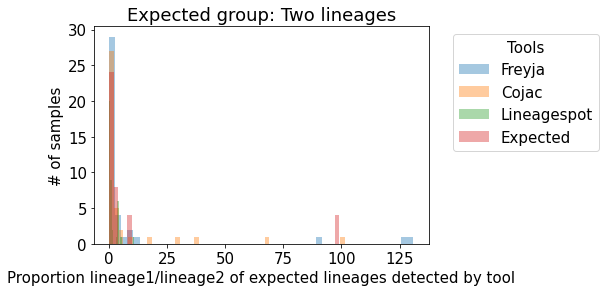

In [80]:
fr_plot = sns.distplot(a=df_twolin["l1/l2 (Freyja)"], hist=True, kde=False, rug=False)
co_plot = sns.distplot(a=df_twolin["l1/l2 (Cojac)"], hist=True, kde=False, rug=False )
ls_plot = sns.distplot(a=df_twolin["l1/l2 (Lineagespot)"], hist=True, kde=False, rug=False )
ex_plot = sns.distplot(a=df_twolin["Expected l1/l2"], hist=True, kde=False, rug=False )
plt.title(label='Expected group: Two lineages')
plt.xlabel(xlabel='Proportion lineage1/lineage2 of expected lineages detected by tool')

plt.ylabel(ylabel='# of samples')
plt.legend(title='Tools', loc='upper left', bbox_to_anchor=(1.05, 1), labels=['Freyja', 'Cojac', 'Lineagespot', 'Expected'])
plt.show()

# Sub-group of samples: Two lineages 
## in case of both expected lineages are detected
In the next plots we will have a look at 2 types of samples from the group "Two lineages":
- Both expected lineages detected
- Both expected + unexpected lineages detected

### BA.1 and BA.2 lineages

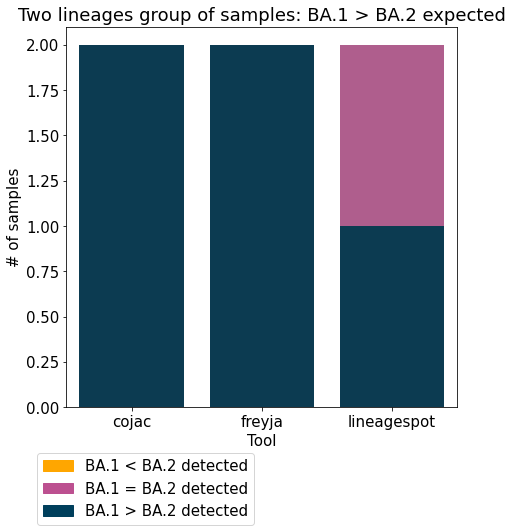

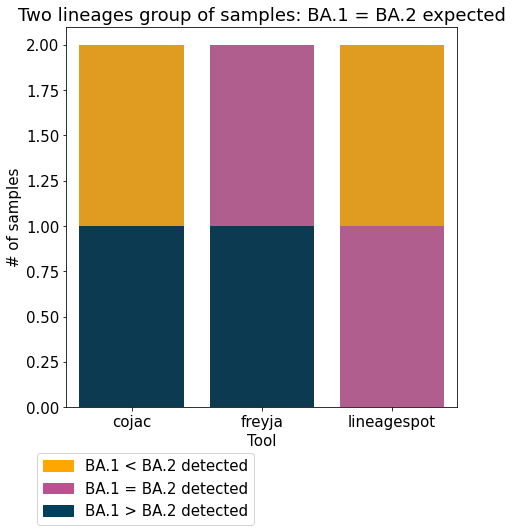

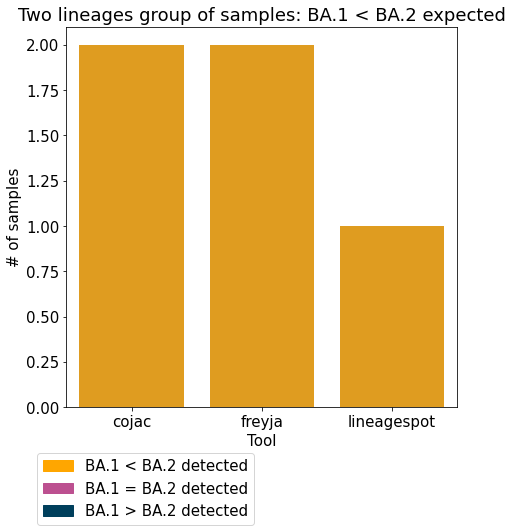

In [81]:
#BA1 > BA2 expected plot
plt.figure(figsize=(7, 7))

ba1Gba2 = df_twolin_l1l2o_ba1Gba2[df_twolin_l1l2o_ba1Gba2.Detected=='BA.1 > BA.2'].groupby('Tool')['# of samples'].sum().reset_index()
ba1EQba2 = df_twolin_l1l2o_ba1Gba2[df_twolin_l1l2o_ba1Gba2.Detected=='BA.1 = BA.2'].groupby('Tool')['# of samples'].sum().reset_index()
ba1Lba2 = df_twolin_l1l2o_ba1Gba2[df_twolin_l1l2o_ba1Gba2.Detected=='BA.1 < BA.2'].groupby('Tool')['# of samples'].sum().reset_index()

ba1Gba2['# of samples'] = ba1Gba2['# of samples']
ba1EQba2['# of samples'] =ba1Gba2['# of samples'] + ba1EQba2['# of samples']
ba1Lba2['# of samples'] = ba1EQba2['# of samples'] + ba1Lba2['# of samples']

bar1 = sns.barplot(x="Tool", y="# of samples", data=ba1Lba2, color='#ffa600')
bar2 = sns.barplot(x="Tool", y="# of samples", data=ba1EQba2, color='#bc5090')
bar3 = sns.barplot(x="Tool", y="# of samples", data=ba1Gba2, color='#003f5c')

top_bar = mpatches.Patch(color='#ffa600', label='BA.1 < BA.2 detected')
mid_bar = mpatches.Patch(color='#bc5090', label='BA.1 = BA.2 detected')
bottom_bar = mpatches.Patch(color='#003f5c', label='BA.1 > BA.2 detected')
plt.legend(handles=[top_bar, mid_bar, bottom_bar], loc='upper right', bbox_to_anchor=(0.5, -0.1))
plt.title(label='Two lineages group of samples: BA.1 > BA.2 expected')

plt.show()

#BA1 = BA2 expected plot
plt.figure(figsize=(7, 7))

ba1Gba2 = df_twolin_l1l2o_ba1EQba2[df_twolin_l1l2o_ba1EQba2.Detected=='BA.1 > BA.2'].groupby('Tool')['# of samples'].sum().reset_index()
ba1EQba2 = df_twolin_l1l2o_ba1EQba2[df_twolin_l1l2o_ba1EQba2.Detected=='BA.1 = BA.2'].groupby('Tool')['# of samples'].sum().reset_index()
ba1Lba2 = df_twolin_l1l2o_ba1EQba2[df_twolin_l1l2o_ba1EQba2.Detected=='BA.1 < BA.2'].groupby('Tool')['# of samples'].sum().reset_index()

ba1Gba2['# of samples'] = ba1Gba2['# of samples']
ba1EQba2['# of samples'] =ba1Gba2['# of samples'] + ba1EQba2['# of samples']
ba1Lba2['# of samples'] = ba1EQba2['# of samples'] + ba1Lba2['# of samples']

bar1 = sns.barplot(x="Tool", y="# of samples", data=ba1Lba2, color='#ffa600')
bar2 = sns.barplot(x="Tool", y="# of samples", data=ba1EQba2, color='#bc5090')
bar3 = sns.barplot(x="Tool", y="# of samples", data=ba1Gba2, color='#003f5c')

top_bar = mpatches.Patch(color='#ffa600', label='BA.1 < BA.2 detected')
mid_bar = mpatches.Patch(color='#bc5090', label='BA.1 = BA.2 detected')
bottom_bar = mpatches.Patch(color='#003f5c', label='BA.1 > BA.2 detected')
plt.legend(handles=[top_bar, mid_bar, bottom_bar], loc='upper right', bbox_to_anchor=(0.5, -0.1))
plt.title(label='Two lineages group of samples: BA.1 = BA.2 expected')

plt.show()

#BA1 < BA2 expected plot
plt.figure(figsize=(7, 7))

ba1Gba2 = df_twolin_l1l2o_ba1Lba2[df_twolin_l1l2o_ba1Lba2.Detected=='BA.1 > BA.2'].groupby('Tool')['# of samples'].sum().reset_index()
ba1EQba2 = df_twolin_l1l2o_ba1Lba2[df_twolin_l1l2o_ba1Lba2.Detected=='BA.1 = BA.2'].groupby('Tool')['# of samples'].sum().reset_index()
ba1Lba2 = df_twolin_l1l2o_ba1Lba2[df_twolin_l1l2o_ba1Lba2.Detected=='BA.1 < BA.2'].groupby('Tool')['# of samples'].sum().reset_index()

ba1Gba2['# of samples'] = ba1Gba2['# of samples']
ba1EQba2['# of samples'] =ba1Gba2['# of samples'] + ba1EQba2['# of samples']
ba1Lba2['# of samples'] = ba1EQba2['# of samples'] + ba1Lba2['# of samples']

bar1 = sns.barplot(x="Tool", y="# of samples", data=ba1Lba2, color='#ffa600')
bar2 = sns.barplot(x="Tool", y="# of samples", data=ba1EQba2, color='#bc5090')
bar3 = sns.barplot(x="Tool", y="# of samples", data=ba1Gba2, color='#003f5c')

top_bar = mpatches.Patch(color='#ffa600', label='BA.1 < BA.2 detected')
mid_bar = mpatches.Patch(color='#bc5090', label='BA.1 = BA.2 detected')
bottom_bar = mpatches.Patch(color='#003f5c', label='BA.1 > BA.2 detected')
#plt.legend(handles=[top_bar, mid_bar, bottom_bar], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.legend(handles=[top_bar, mid_bar, bottom_bar], loc='upper right', bbox_to_anchor=(0.5, -0.1))
plt.title(label='Two lineages group of samples: BA.1 < BA.2 expected')

plt.show()

For two lineage expected group of samples, there are only 6 samples where BA.1 and BA.2 lineages were expected together: 2 for every type of relation. For the case, when proportion of BA.1 > BA.2 expected, both Cojac and Freyja detected the same relation between these two lineages, while Lineagespot only in 1 sample. In case of equal presence of BA.1 and BA.2 in samples, Freyja and Lineagespot detected 1 sample against 2 expected. In case of BA.1 < BA.2 all tools detected samples correctly, however, Lineagesspot detected only 1 out of 2. 

### BA.1 and Delta lineages

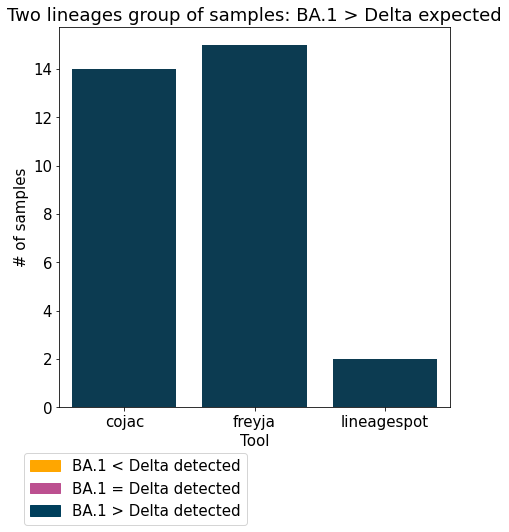

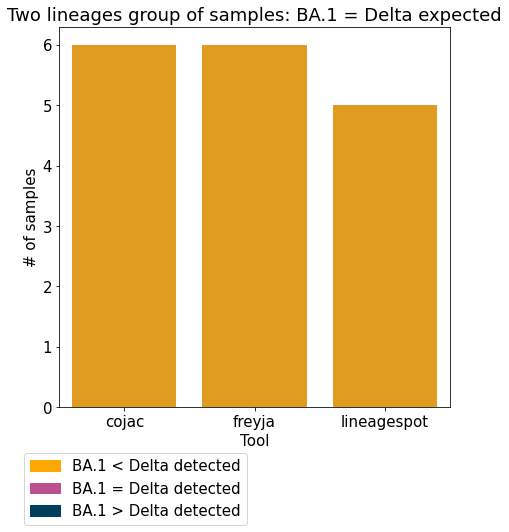

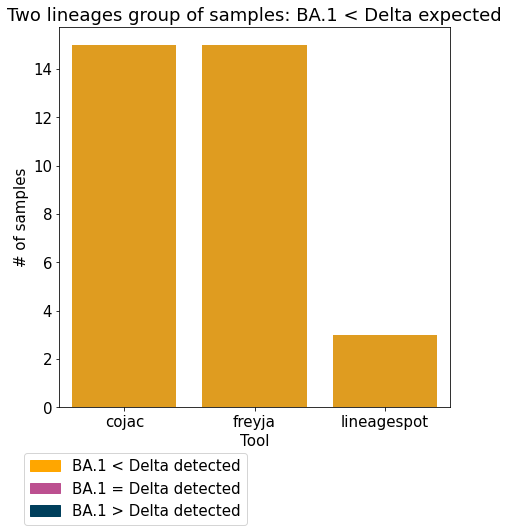

In [82]:
#BA1 > Delta expected plot
plt.figure(figsize=(7, 7))

ba1Gd = df_twolin_l1l2o_ba1Gd[df_twolin_l1l2o_ba1Gd.Detected=='BA.1 > Delta'].groupby('Tool')['# of samples'].sum().reset_index()
ba1EQd = df_twolin_l1l2o_ba1Gd[df_twolin_l1l2o_ba1Gd.Detected=='BA.1 = Delta'].groupby('Tool')['# of samples'].sum().reset_index()
ba1Ld = df_twolin_l1l2o_ba1Gd[df_twolin_l1l2o_ba1Gd.Detected=='BA.1 < Delta'].groupby('Tool')['# of samples'].sum().reset_index()

ba1Gd['# of samples'] = ba1Gd['# of samples']
ba1EQd['# of samples'] =ba1Gd['# of samples'] + ba1EQd['# of samples']
ba1Ld['# of samples'] = ba1EQd['# of samples'] + ba1Ld['# of samples']

bar1 = sns.barplot(x="Tool", y="# of samples", data=ba1Ld, color='#ffa600')
bar2 = sns.barplot(x="Tool", y="# of samples", data=ba1EQd, color='#bc5090')
bar3 = sns.barplot(x="Tool", y="# of samples", data=ba1Gd, color='#003f5c')

top_bar = mpatches.Patch(color='#ffa600', label='BA.1 < Delta detected')
mid_bar = mpatches.Patch(color='#bc5090', label='BA.1 = Delta detected')
bottom_bar = mpatches.Patch(color='#003f5c', label='BA.1 > Delta detected')
plt.legend(handles=[top_bar, mid_bar, bottom_bar], loc='upper right', bbox_to_anchor=(0.5, -0.1))
plt.title(label='Two lineages group of samples: BA.1 > Delta expected')

plt.show()

#BA1 = Delta expected plot
plt.figure(figsize=(7, 7))

ba1Gd = df_twolin_l1l2o_ba1EQd[df_twolin_l1l2o_ba1EQd.Detected=='BA.1 > Delta'].groupby('Tool')['# of samples'].sum().reset_index()
ba1EQd = df_twolin_l1l2o_ba1EQd[df_twolin_l1l2o_ba1EQd.Detected=='BA.1 = Delta'].groupby('Tool')['# of samples'].sum().reset_index()
ba1Ld = df_twolin_l1l2o_ba1EQd[df_twolin_l1l2o_ba1EQd.Detected=='BA.1 < Delta'].groupby('Tool')['# of samples'].sum().reset_index()

ba1Gd['# of samples'] = ba1Gd['# of samples']
ba1EQd['# of samples'] =ba1Gd['# of samples'] + ba1EQd['# of samples']
ba1Ld['# of samples'] = ba1EQd['# of samples'] + ba1Ld['# of samples']

bar1 = sns.barplot(x="Tool", y="# of samples", data=ba1Ld, color='#ffa600')
bar2 = sns.barplot(x="Tool", y="# of samples", data=ba1EQd, color='#bc5090')
bar3 = sns.barplot(x="Tool", y="# of samples", data=ba1Gd, color='#003f5c')

top_bar = mpatches.Patch(color='#ffa600', label='BA.1 < Delta detected')
mid_bar = mpatches.Patch(color='#bc5090', label='BA.1 = Delta detected')
bottom_bar = mpatches.Patch(color='#003f5c', label='BA.1 > Delta detected')
plt.legend(handles=[top_bar, mid_bar, bottom_bar], loc='upper right', bbox_to_anchor=(0.5, -0.1))
plt.title(label='Two lineages group of samples: BA.1 = Delta expected')

plt.show()

#BA1 < Delta expected plot
plt.figure(figsize=(7, 7))

ba1Gd = df_twolin_l1l2o_ba1Ld[df_twolin_l1l2o_ba1Ld.Detected=='BA.1 > Delta'].groupby('Tool')['# of samples'].sum().reset_index()
ba1EQd = df_twolin_l1l2o_ba1Ld[df_twolin_l1l2o_ba1Ld.Detected=='BA.1 = Delta'].groupby('Tool')['# of samples'].sum().reset_index()
ba1Ld = df_twolin_l1l2o_ba1Ld[df_twolin_l1l2o_ba1Ld.Detected=='BA.1 < Delta'].groupby('Tool')['# of samples'].sum().reset_index()

ba1Gd['# of samples'] = ba1Gd['# of samples']
ba1EQd['# of samples'] =ba1Gd['# of samples'] + ba1EQd['# of samples']
ba1Ld['# of samples'] = ba1EQd['# of samples'] + ba1Ld['# of samples']

bar1 = sns.barplot(x="Tool", y="# of samples", data=ba1Ld, color='#ffa600')
bar2 = sns.barplot(x="Tool", y="# of samples", data=ba1EQd, color='#bc5090')
bar3 = sns.barplot(x="Tool", y="# of samples", data=ba1Gd, color='#003f5c')

top_bar = mpatches.Patch(color='#ffa600', label='BA.1 < Delta detected')
mid_bar = mpatches.Patch(color='#bc5090', label='BA.1 = Delta detected')
bottom_bar = mpatches.Patch(color='#003f5c', label='BA.1 > Delta detected')
plt.legend(handles=[top_bar, mid_bar, bottom_bar], loc='upper right', bbox_to_anchor=(0.5, -0.1))
plt.title(label='Two lineages group of samples: BA.1 < Delta expected')

plt.show()

For two lineage expected group of samples, there are 42 samples where BA.1 and Delta lineages were expected together: 18 for BA.1 > Delta type of relation between lineage proportions, 6 for BA.1 = Delta, and 18 samples for BA.1 < Delta. For the case, when proportion of BA.1 > Delta expected, all tools detected correctly but not all 18 samples. However, Freyja and Cojac performed well being able to detect 15 and 14 samples with this type of relation, respectively. Lineagespot detected only 2 samples. Likewise, for the case of BA.1 < Delta all tools detected some samples but not all expected samples, Freyja and Cojac both detected 15 out of 18 which is much better than Lineagespot with its 3. Finally, when BA.1 = Delta was expected relation, all tools discerned BA.1 < Delta relation.